### Students Grade Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

#### The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

In [4]:
#df = pd.read_csv("https://github.com/dsrscientist/dataset4/blob/main/Grades.csv")
#df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 35, saw 8


In [2]:
# Using raw data.csv file to read the data.
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

Here we see there are 571 rows and 43 Columns.
Columns description:
    
Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Here all the data is available in Object type and also they are categorical, only <b>tareget Column CGPA</b> is in Float type and it is continous, so we consider this as regression problem, and we need to convert all object to int values then we need to preoced with further process.


In [3]:
df.shape

(571, 43)

In [4]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [5]:
df.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

We see that there is so many missing values and there are 42 columns with object datatype and only one float value. There are 571 rows and 43 columns.

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

First we will treat missing values and then convert object datatypes to int datatype. 

We see Seat No is different for each student so its not required for predicting the data, so we will drop seat-no. Next we will fill the null values.

In [8]:
df.drop(['Seat No.'], axis =1, inplace=True)
df

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1        A      D     D+         D     B-      C      D      A     D+      D   
2        A      B      A        B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+         D      D     A-     D+     C-      D     C+   
4       A-     A-     A-        B+      A      A     A-     B+      A     A-   
..     ...    ...    ...       ...    ...    ...    ...    ...    ...    ...   
566      B      A      A        A-     A+      A     A-     A-     A+     B+   
567     A+      A      A         A      A      A      A     A-      A      A   
568      B      A     A-        B+      A      A      A      A      A      B   
569      A     B+      D         A      D     D+     B-     C-     B-     C-   
570      C      D      D         C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0    ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1    ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2    ...      B      B      A      C      A      A      A     A-      A  3.608  
3    ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4    ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
566  ...     A-     A-      A      A      A     B+     B+      B      A  3.798  
567  ...     B+     B+      A      A     A-      B     A-      C     A-  3.772  
568  ...     A-      B      A     B+      A      C     B+     A-     A-  3.470  
569  ...      D      B      B     C-      D      C      B     B-      C  2.193  
570  ...     C+      C     B-      D      F     C-     B+      D     C-  1.753  

[571 rows x 42 columns]

Now, we have droped seat no next we will treat null values.

In [9]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [10]:
df['CS-406'].mode()

0    A-
Name: CS-406, dtype: object

Since all the columns are categorical, we will fill the null values using mode method.

In [11]:
df['CS-406'].fillna(df['CS-406'].mode()[0], inplace=True)
df['CS-412'].fillna(df['CS-412'].mode()[0], inplace=True)
df['CS-414'].fillna(df['CS-414'].mode()[0],inplace =True)
df['CS-419'].fillna(df['CS-419'].mode()[0],inplace =True)
df['CS-423'].fillna(df['CS-423'].mode()[0],inplace =True)
df['HS-205/20'].fillna(df['HS-205/20'].mode()[0],inplace =True)
df['MT-222'].fillna(df['MT-222'].mode()[0], inplace=True)
df['EE-222'].fillna(df['EE-222'].mode()[0],inplace =True)
df['MT-224'].fillna(df['MT-224'].mode()[0],inplace =True)
df['CS-210'].fillna(df['CS-210'].mode()[0],inplace =True)
df['CS-211'].fillna(df['CS-211'].mode()[0],inplace =True)
df['CS-203'].fillna(df['CS-203'].mode()[0], inplace=True)
df['CS-214'].fillna(df['CS-214'].mode()[0],inplace =True)
df['EE-217'].fillna(df['EE-217'].mode()[0],inplace =True)
df['CS-212'].fillna(df['CS-212'].mode()[0],inplace =True)
df['CS-215'].fillna(df['CS-215'].mode()[0],inplace =True)
df['MT-331'].fillna(df['MT-331'].mode()[0],inplace =True)
df['EF-303'].fillna(df['EF-303'].mode()[0],inplace =True)
df['HS-304'].fillna(df['HS-304'].mode()[0],inplace =True)
df['CS-301'].fillna(df['CS-301'].mode()[0], inplace=True)
df['CS-302'].fillna(df['CS-302'].mode()[0],inplace =True)
df['TC-383'].fillna(df['TC-383'].mode()[0],inplace =True)
df['MT-442'].fillna(df['MT-442'].mode()[0],inplace =True)
df['EL-332'].fillna(df['EL-332'].mode()[0],inplace =True)
df['CS-318'].fillna(df['CS-318'].mode()[0],inplace =True)
df['CS-306'].fillna(df['CS-306'].mode()[0], inplace=True)
df['CS-312'].fillna(df['CS-312'].mode()[0],inplace =True)
df['CS-317'].fillna(df['CS-317'].mode()[0],inplace =True)
df['CS-403'].fillna(df['CS-403'].mode()[0],inplace =True)
df['CS-421'].fillna(df['CS-421'].mode()[0],inplace =True)

In [12]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       1
HS-105/12    1
MT-111       2
CS-105       0
CS-106       2
EL-102       2
EE-119       2
ME-107       2
CS-107       2
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now we have filled the null values which had 5 and above nulls in a column by using mode method and now left with 1 and 2 nulls in each column, since its very less data which are having null values we will drop those columns.

In [13]:
df.shape

(571, 42)

In [14]:
# drop the rows with nulls.
df.dropna(inplace = True)

In [15]:
df.shape

(566, 42)

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

A-    112
A     111
B+     61
B      57
B-     55
D      43
C      33
C+     30
D+     22
A+     22
C-     19
WU      1
Name: PH-121, dtype: int64


A-    82
B-    77
C     67
B     63
B+    59
C-    50
C+    46
D     45
A     38
D+    35
A+     4
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      48
B-     42
A+     31
D      30
C      19
C+     17
C-     16
D+     13
WU      3
Name: CY-105, dtype: int64


A     96
A-    74
B+    70
B     57
D     44
C     41
B-    40
C+    39
C-    35
D+    34
A+    34
WU     2
Name: HS-105/12, dtype: int64


A-    104
A      99
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       1
Name: MT-111, dtype: int64


A     151
A-    133
B+     60
B      51
A+     43
B-     37
C+     23
C      22
C-     21
D+     14
D      11
Name: CS-105, dtype: int64


A-    116
B+    101
B      95
A      56
B-     54
C+     41
D+     29
C-     27
D      23
C      17
A+      4
WU      2
F       1
Name: 

In [17]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [18]:
col = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
for i in col:
    print(str(i), "has unique values ", len(df[i].unique()))

PH-121 has unique values  12
HS-101 has unique values  11
CY-105 has unique values  12
HS-105/12 has unique values  12
MT-111 has unique values  13
CS-105 has unique values  11
CS-106 has unique values  13
EL-102 has unique values  13
EE-119 has unique values  11
ME-107 has unique values  13
CS-107 has unique values  14
HS-205/20 has unique values  13
MT-222 has unique values  14
EE-222 has unique values  13
MT-224 has unique values  13
CS-210 has unique values  13
CS-211 has unique values  14
CS-203 has unique values  13
CS-214 has unique values  13
EE-217 has unique values  13
CS-212 has unique values  12
CS-215 has unique values  13
MT-331 has unique values  12
EF-303 has unique values  12
HS-304 has unique values  14
CS-301 has unique values  12
CS-302 has unique values  11
TC-383 has unique values  12
MT-442 has unique values  12
EL-332 has unique values  13
CS-318 has unique values  14
CS-306 has unique values  13
CS-312 has unique values  14
CS-317 has unique values  12
CS-403 h

we see there are upto 14 unique values in each features. so these values are in object type we will convert them to int datatype. before that we will plot the graphical analysis of each columns.

#### Univariate Analysis


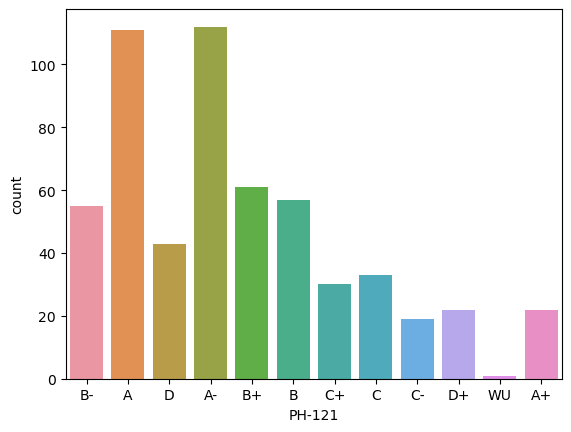

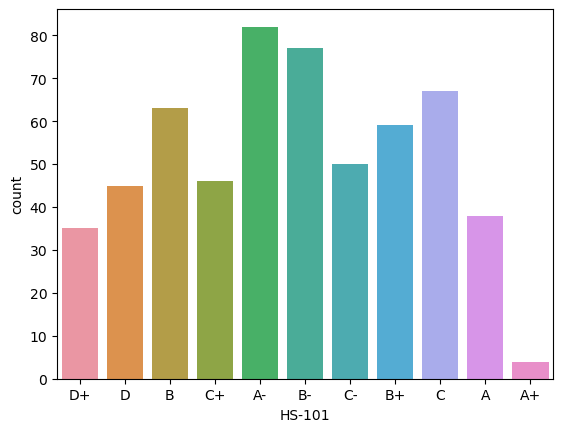

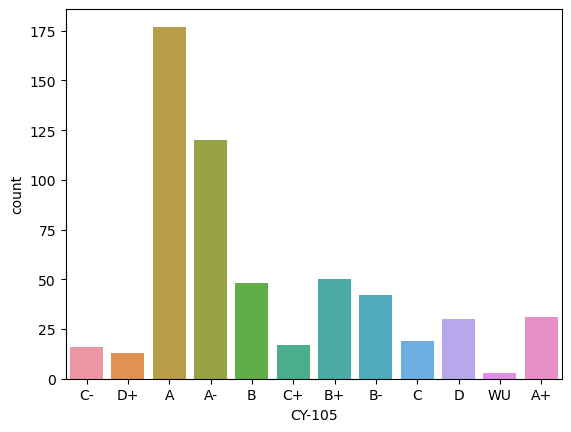

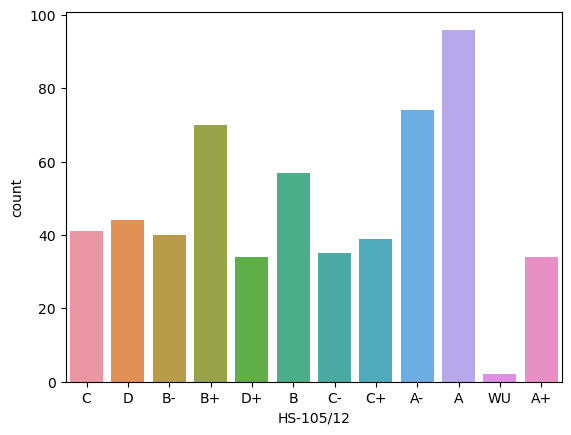

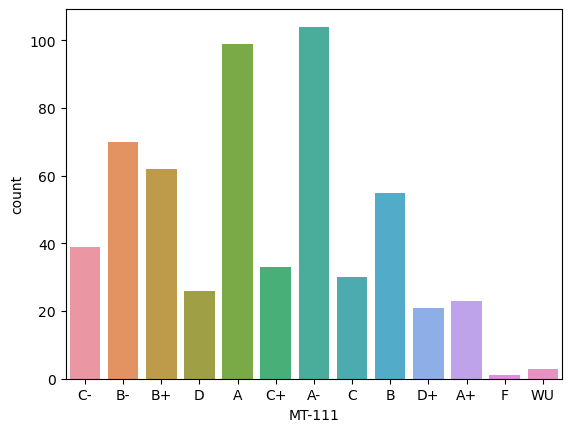

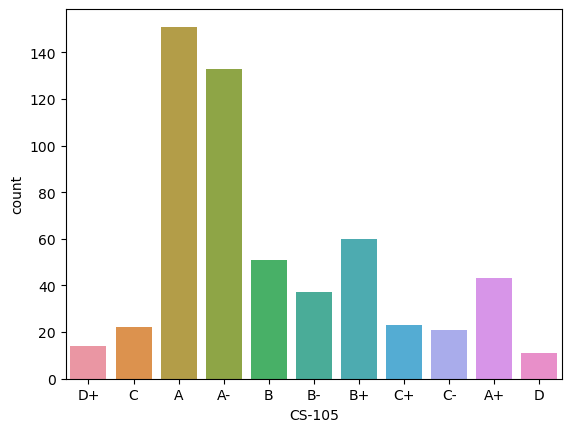

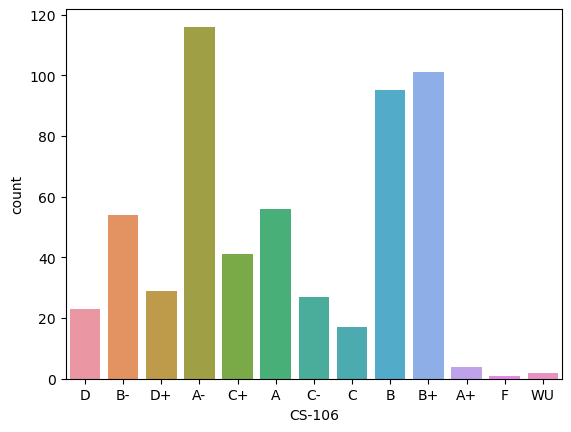

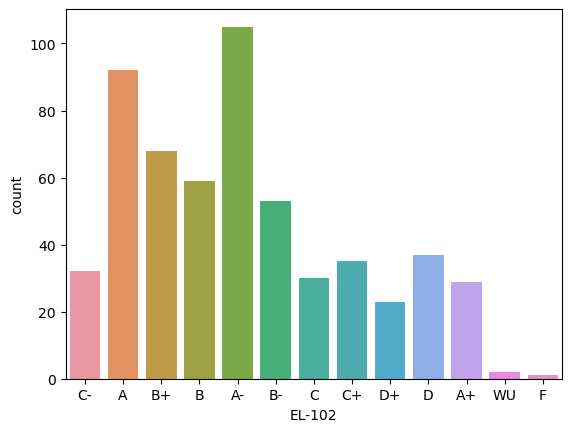

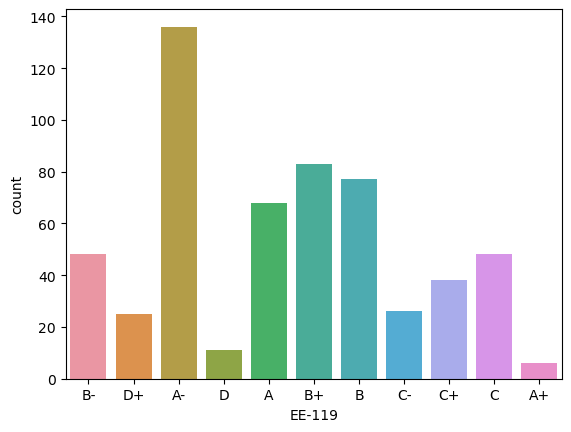

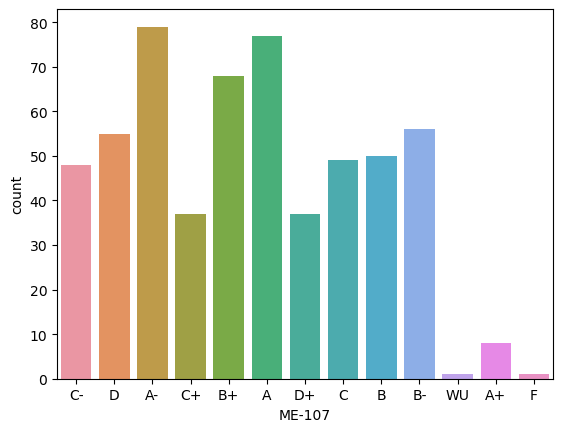

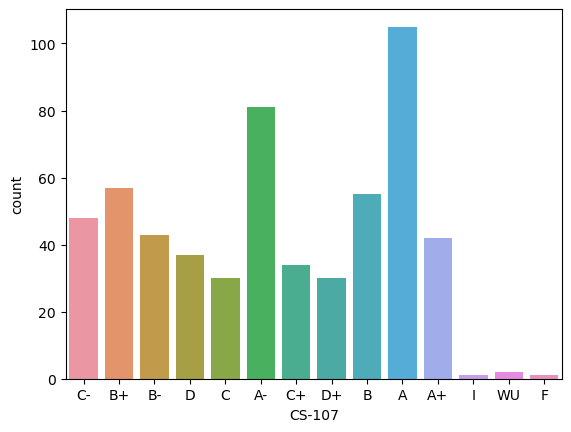

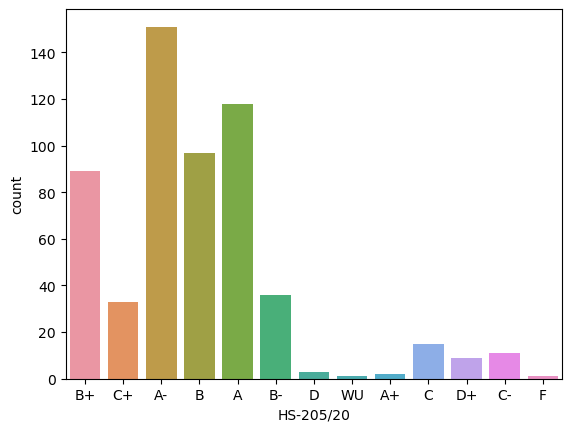

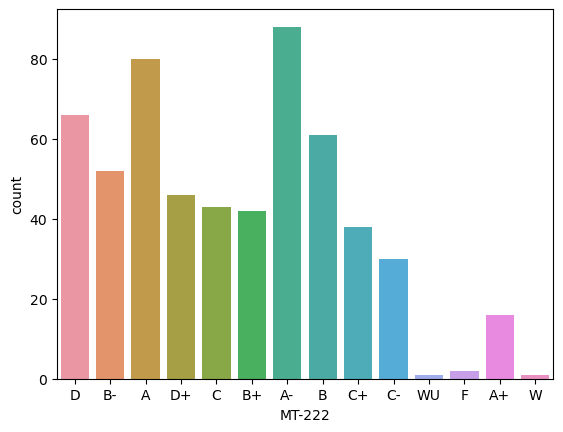

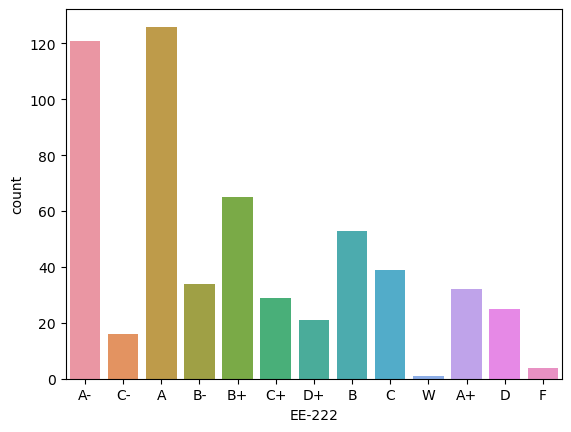

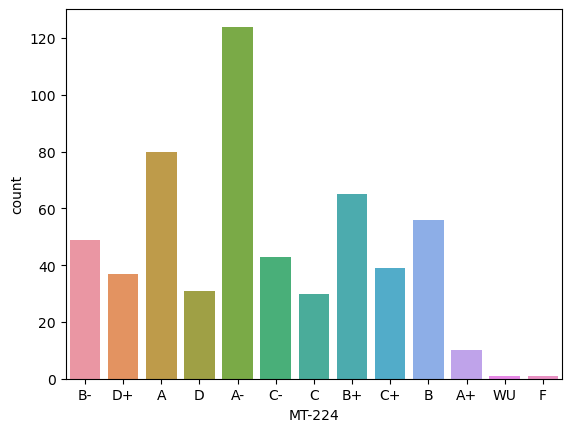

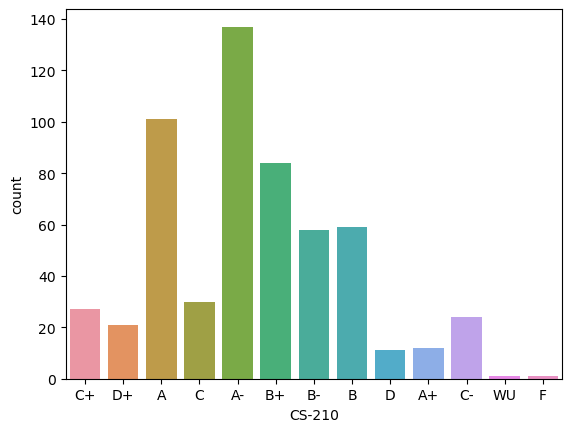

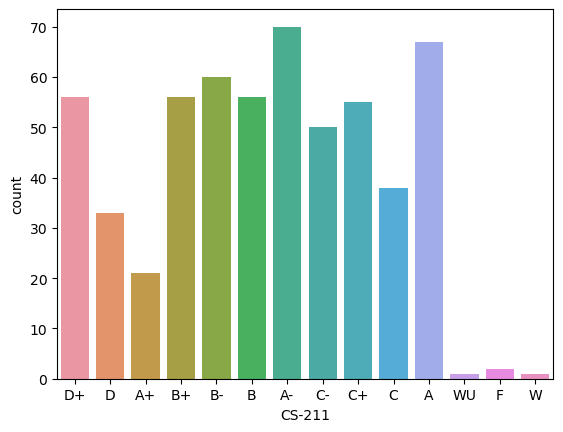

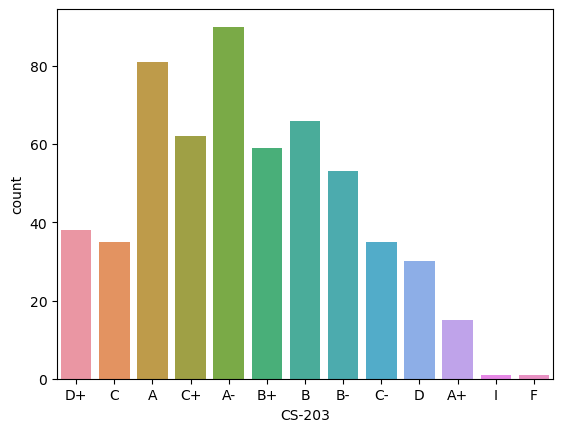

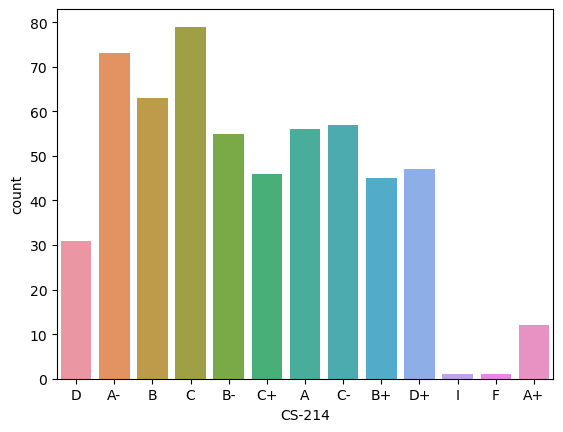

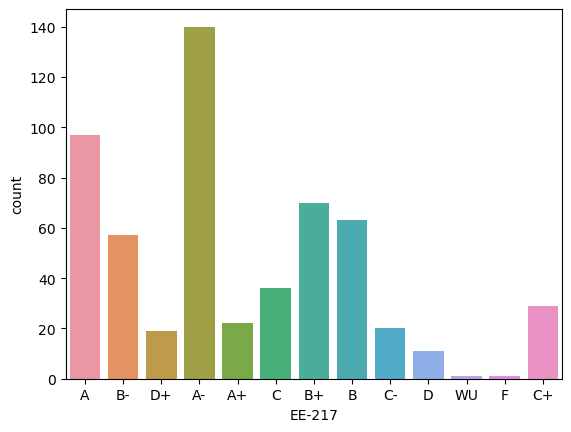

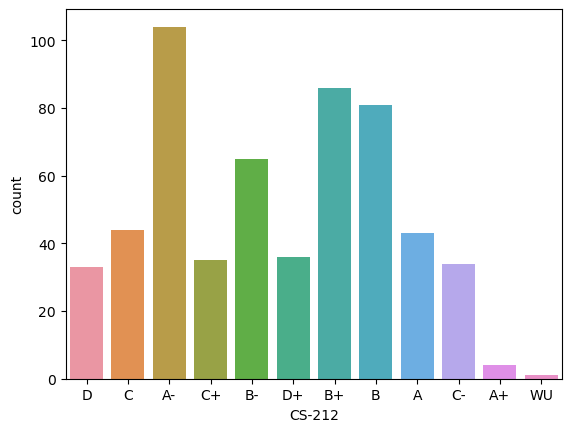

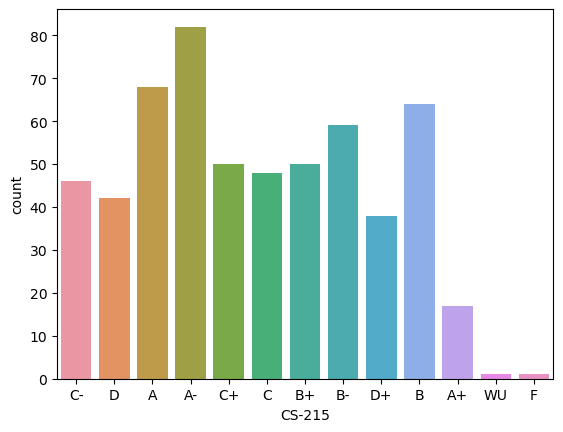

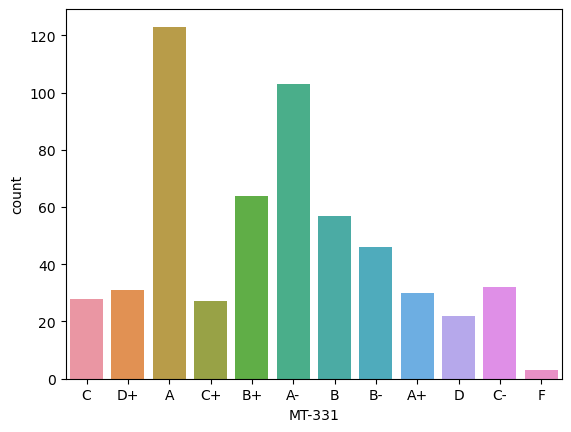

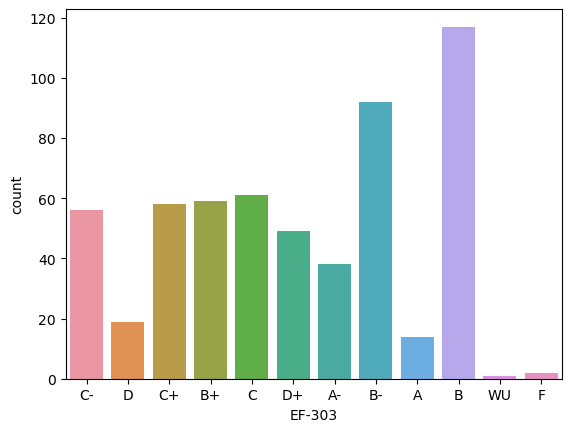

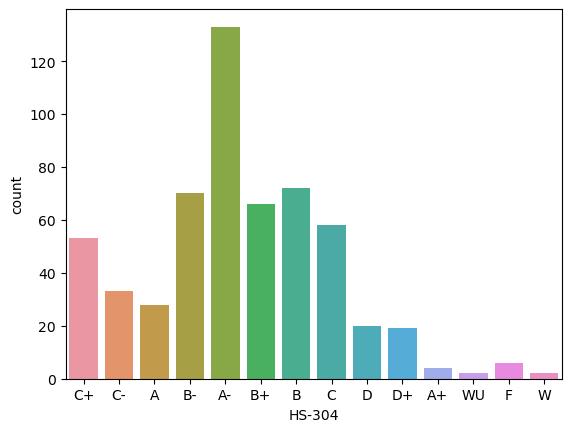

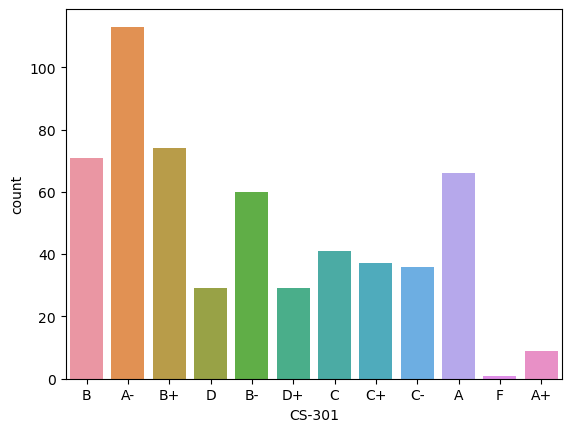

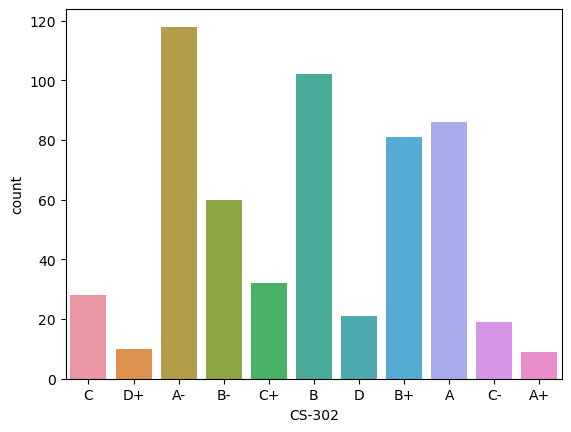

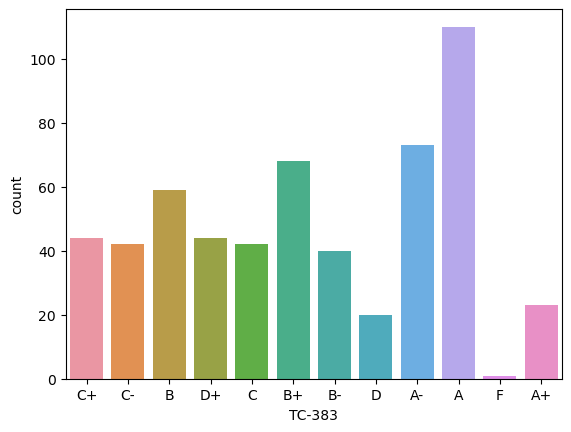

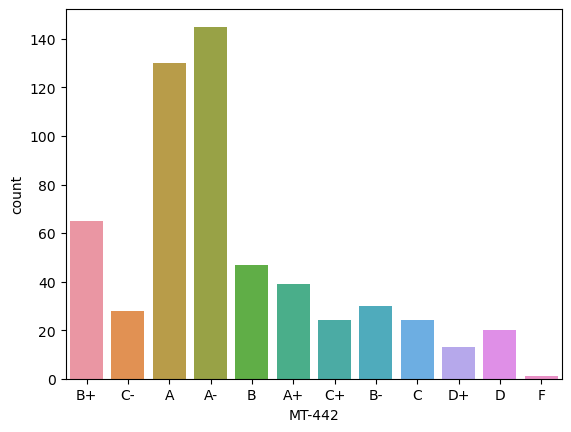

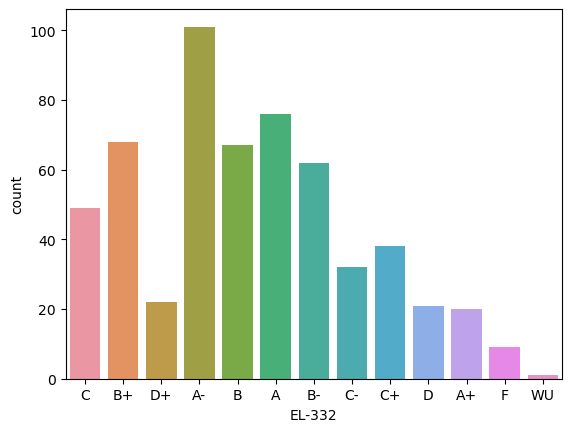

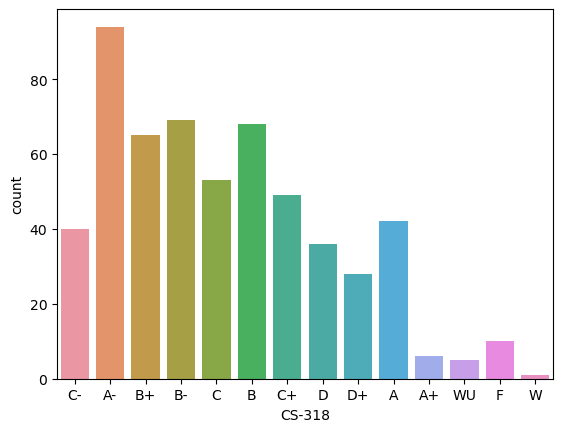

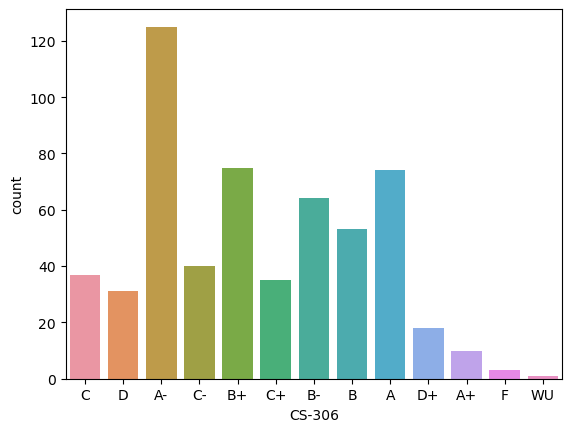

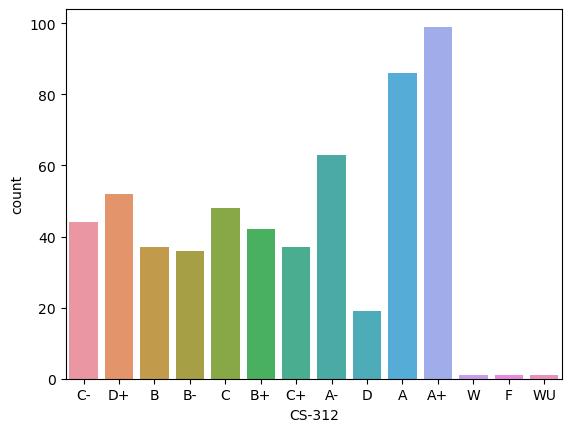

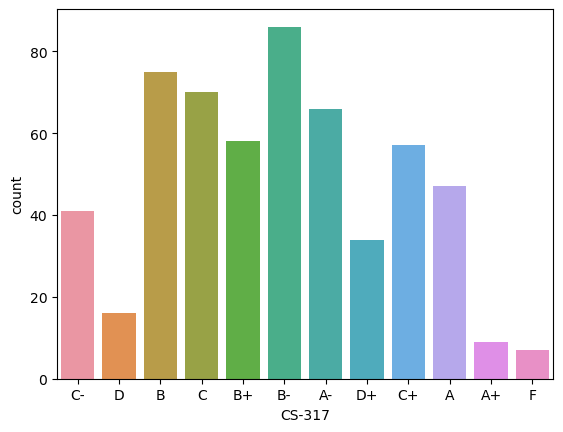

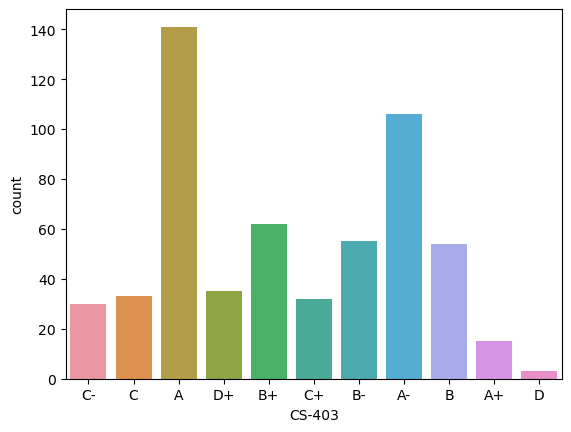

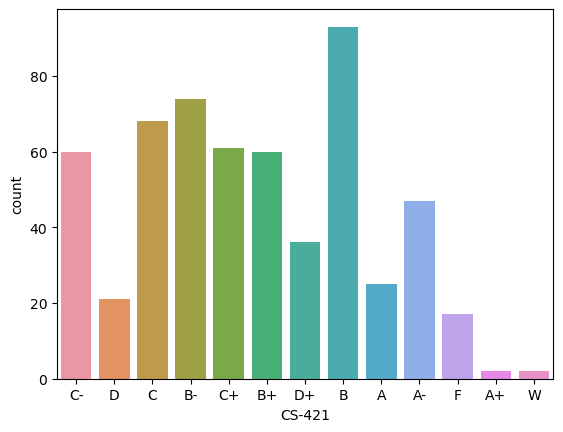

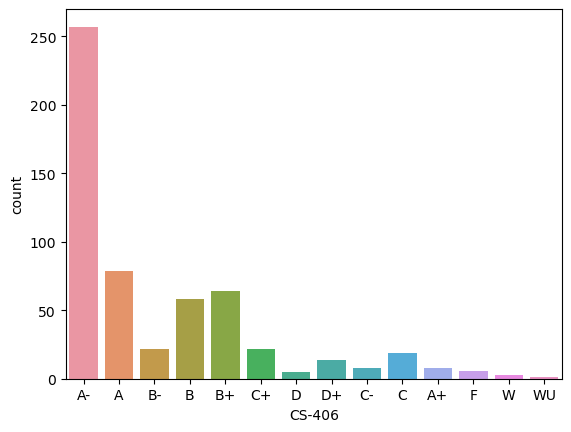

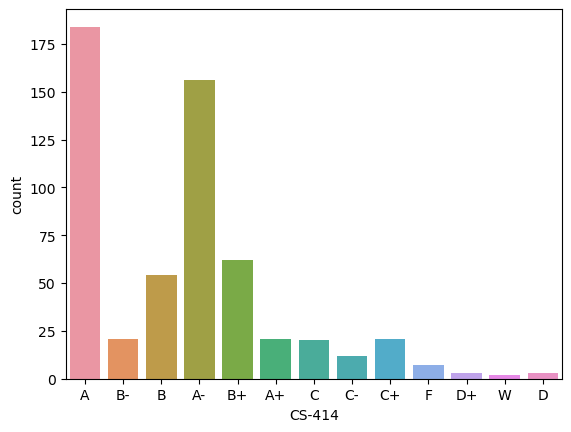

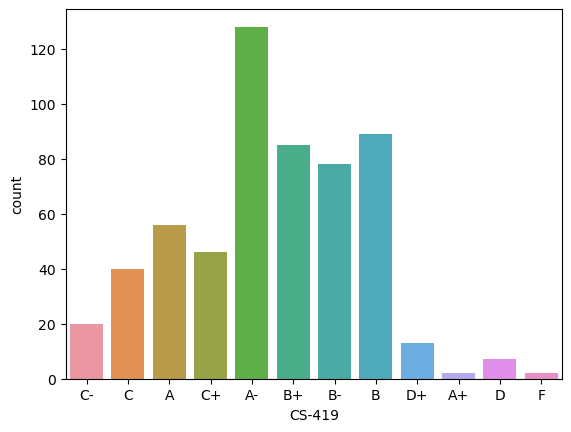

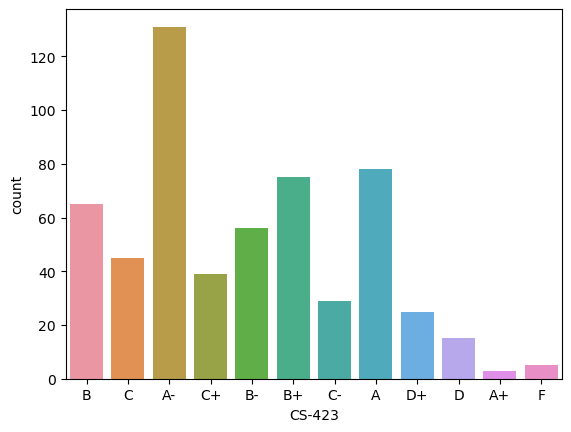

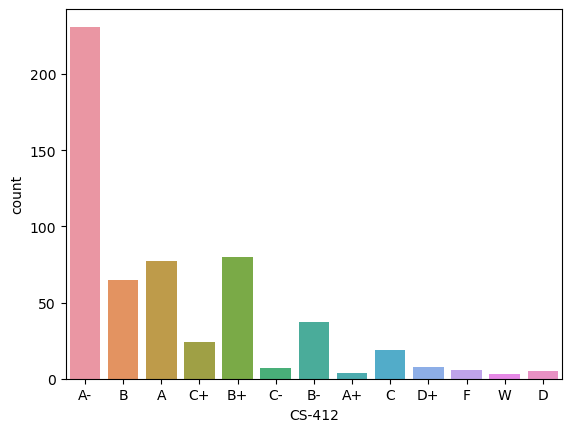

In [19]:
col = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
for i in col:
    sns.countplot(df[i])
    plt.show()

In 
1. PH-121 we see most values are for A and A- and least values for WU.
2. HS-101 we see high values for A- and B- and low in A+.
3. CY-105 high in A and A+ low in WU 
4. HS-105/12 high is A , A- and B+ and low in WU.
5. MT-111 high is A, A-,B- and low in F and WU.
6. CS-105 high in A, A- and low in D and D+.
7. CS-106 high in A- and B+ and low in F and WU.
8. EL-102 high in A and A- and low in WU and F.
9. EE-119 high in A- and B+ and low in A+.
10. ME-107 high in A- and A and low in WU and F.
11. CS-107 high in A- and A and low in I, F and WU.
12. HS-205/20 high in A and A- and low in WU, F, A+.
13. MT-222 has high in A and A- low in W, WU and F.
14. EE-222 has high in A and A- low in W and F.
15. MT-224 has high in A and A- low in WU and F.
16. CS-210 has high in A and A- low in F and WU.
17. CS-211 has high in A and A- low in W and WU.
18. CS-203 has high in A and A- low in F and I.
19. CS-214 has high in C and A- low in F and I.
20. EE-217 has high in A and A- low in F and WU.
21. CS-212 has high in A- and B+ low in A+ and WU.
20. CS-215 has high in A and A- low in F and WU.
20. MT-331 has high in A and A- low in F .
20. EF-303 has high in B and B- low in F and WU.

Similarly We see in all the columns there are high values for A, A-, B, B- and very least values for F, W, WU and I.



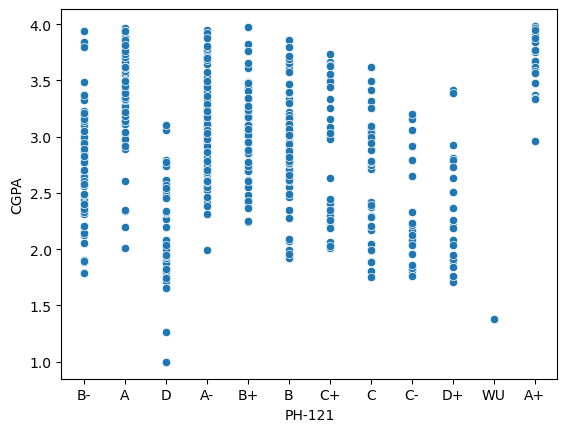

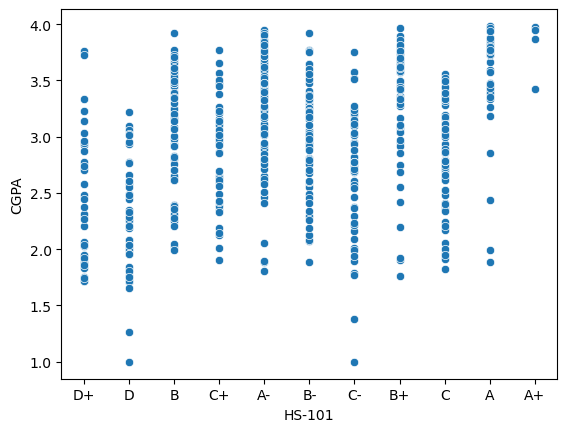

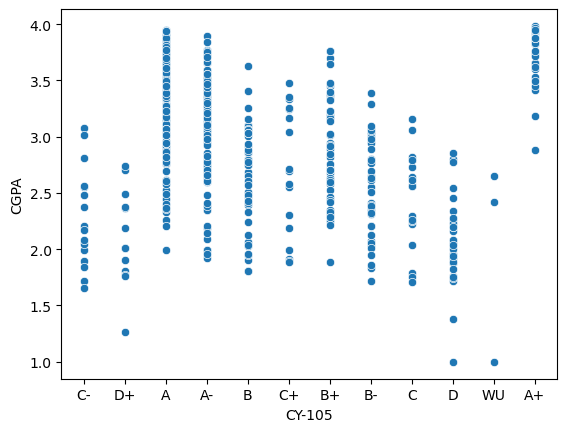

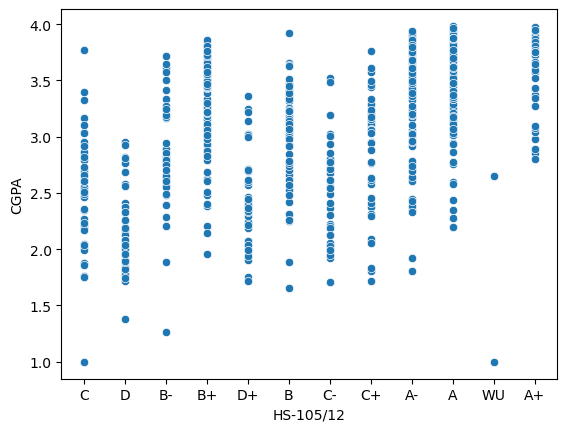

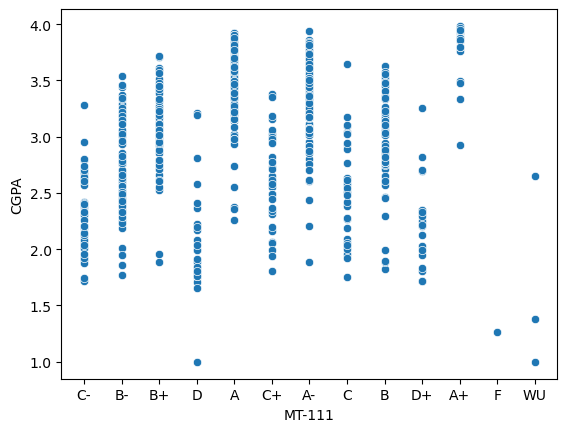

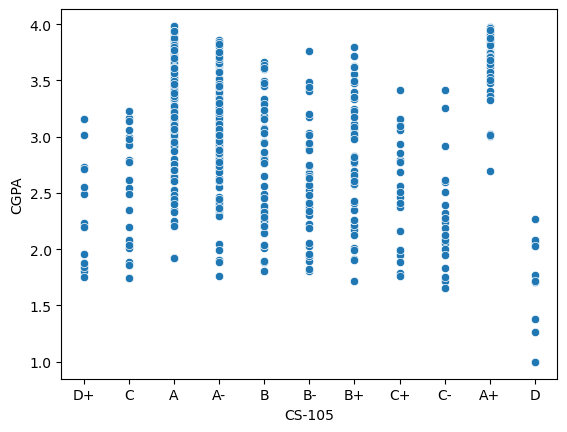

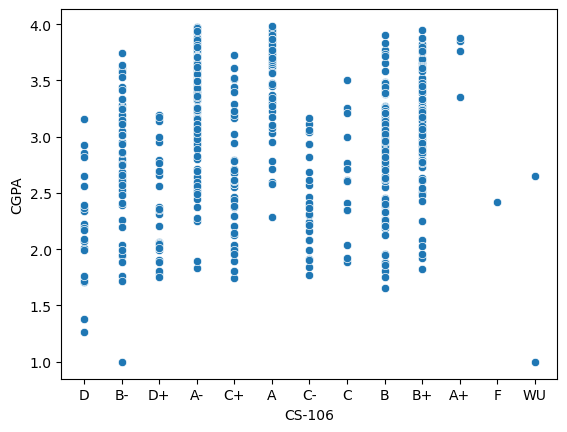

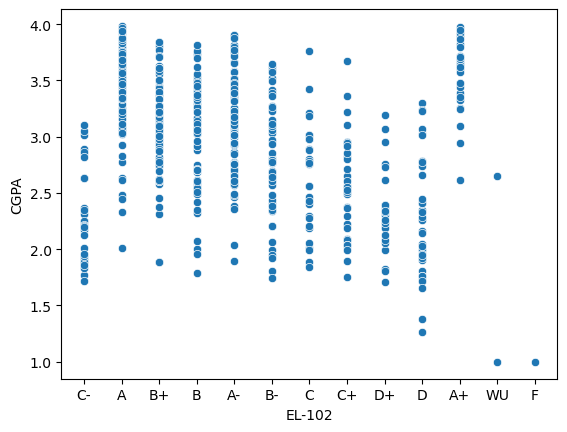

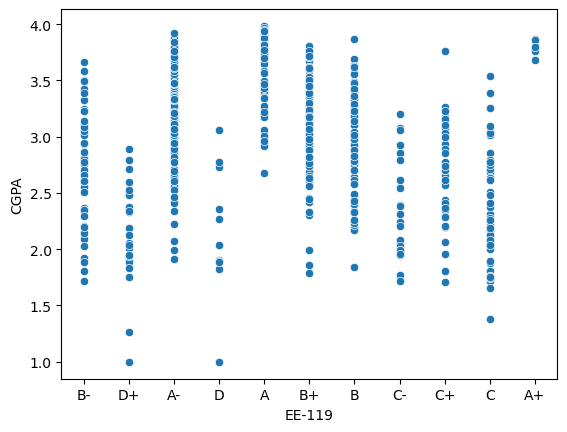

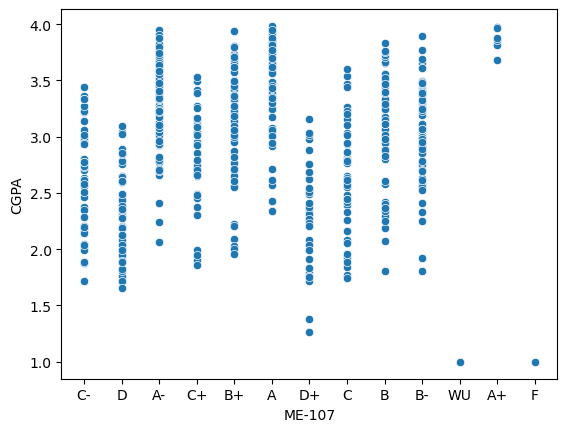

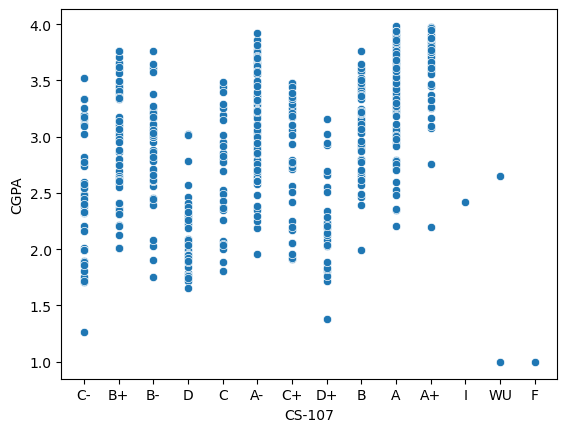

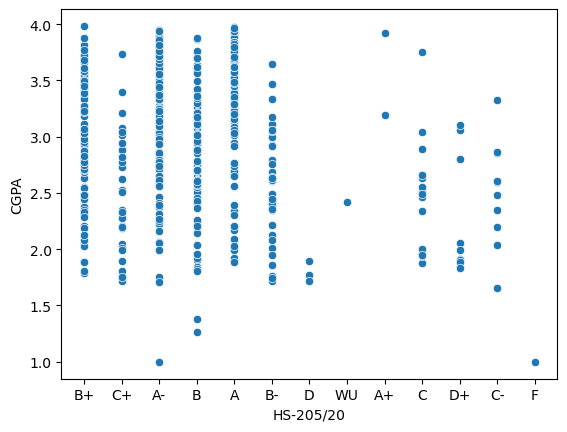

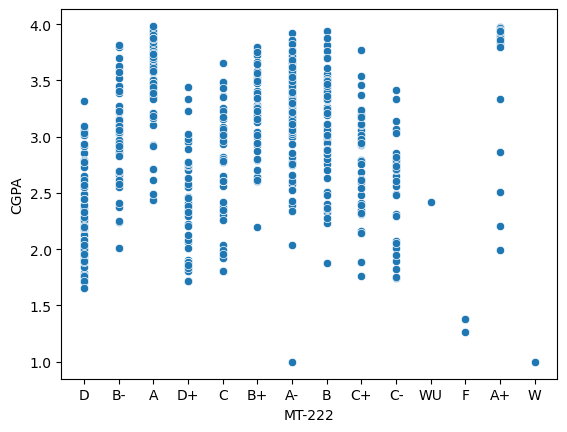

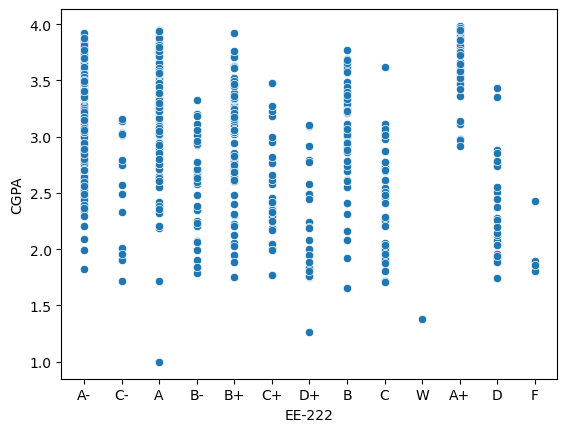

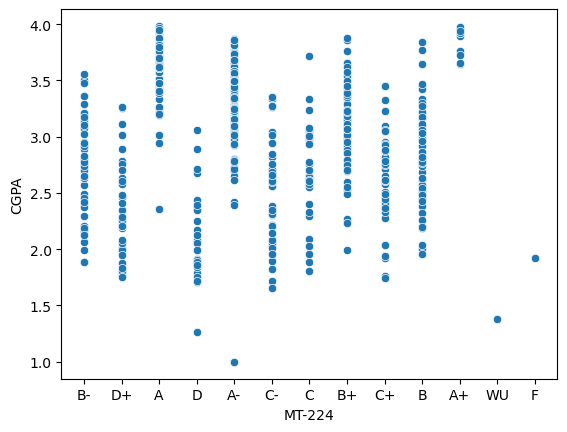

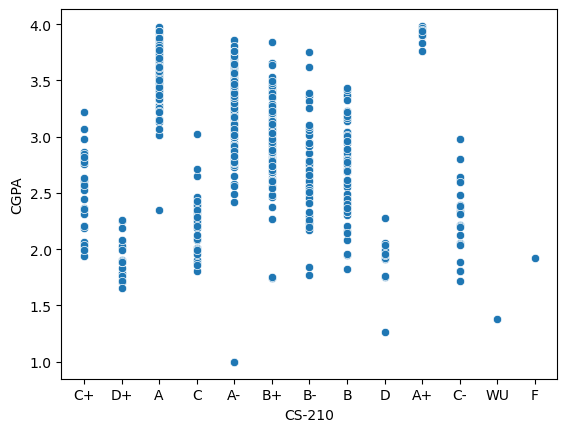

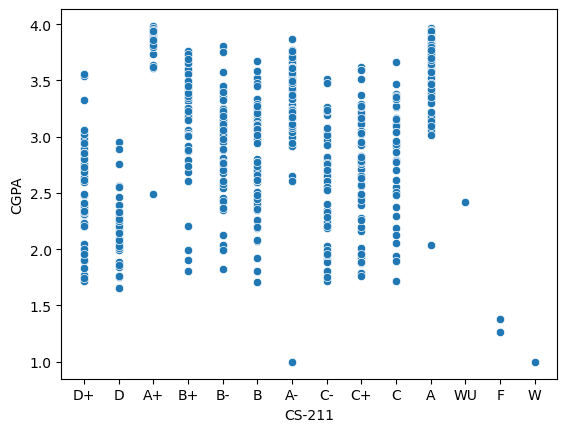

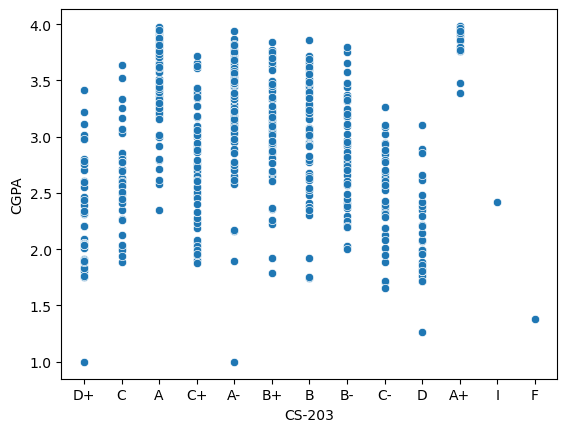

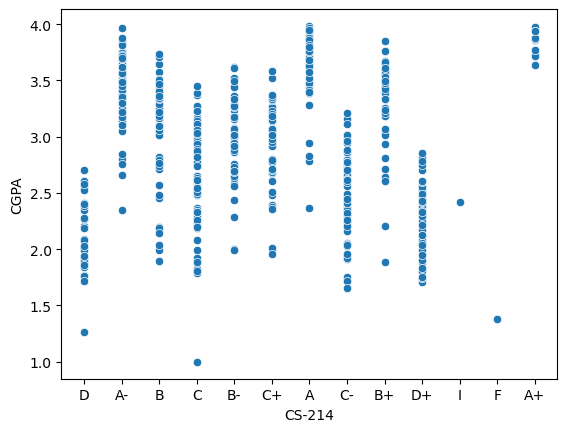

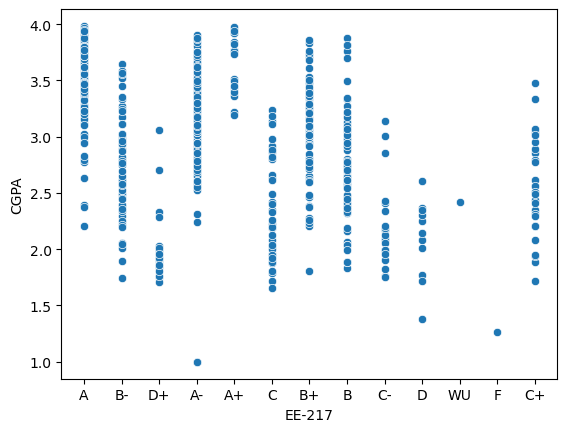

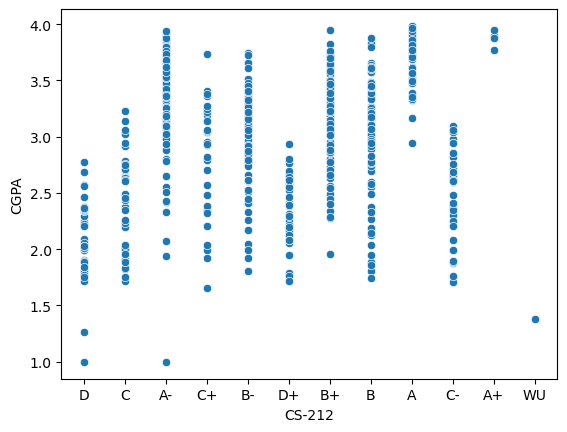

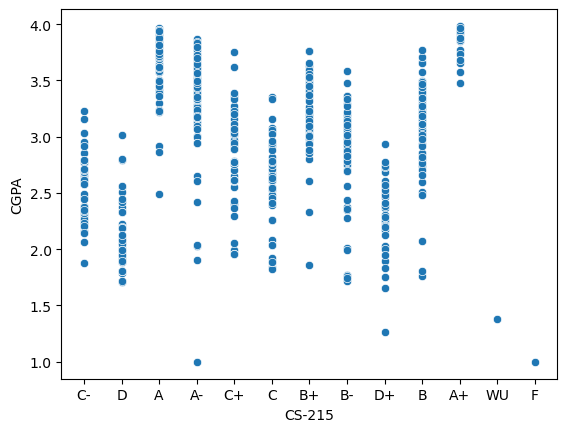

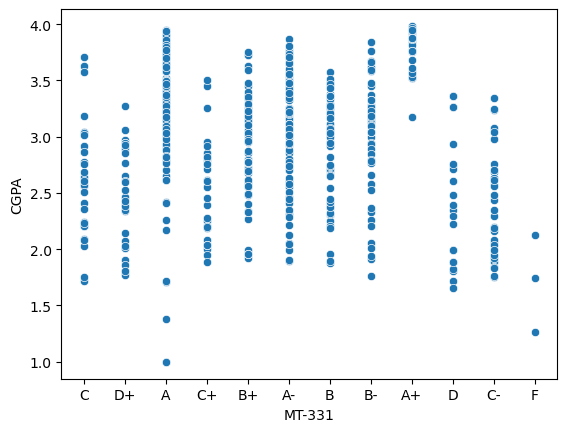

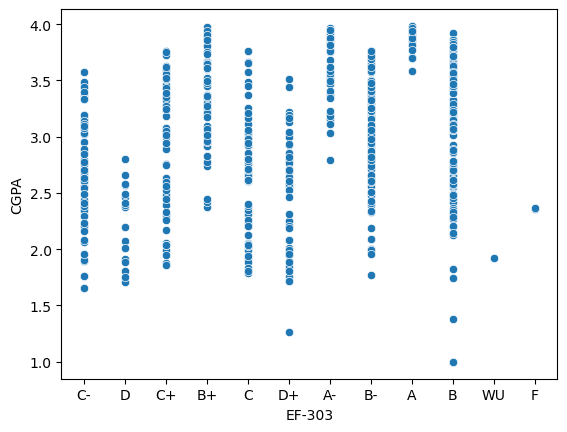

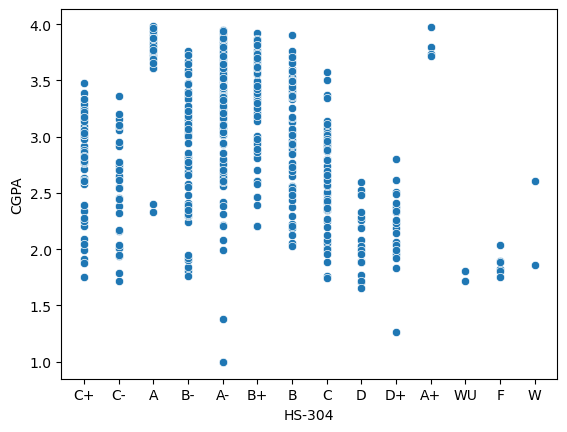

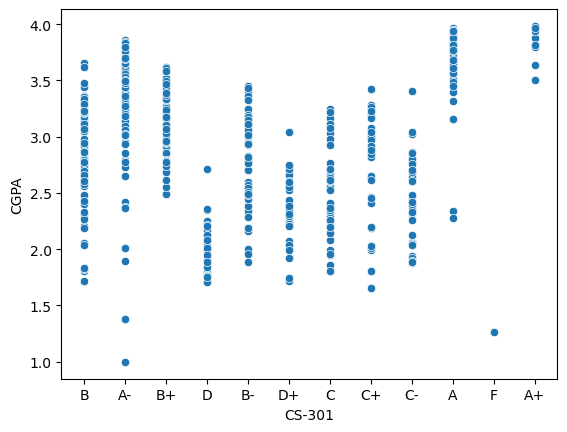

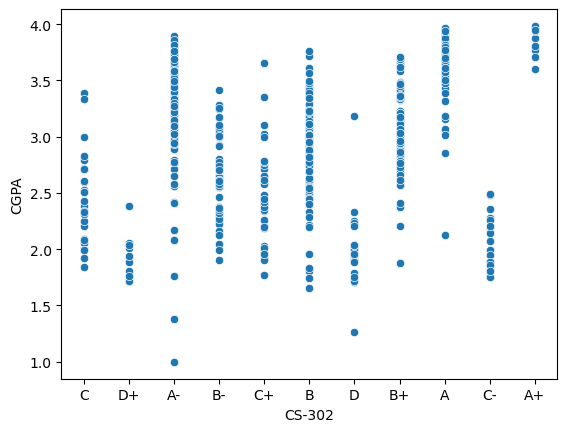

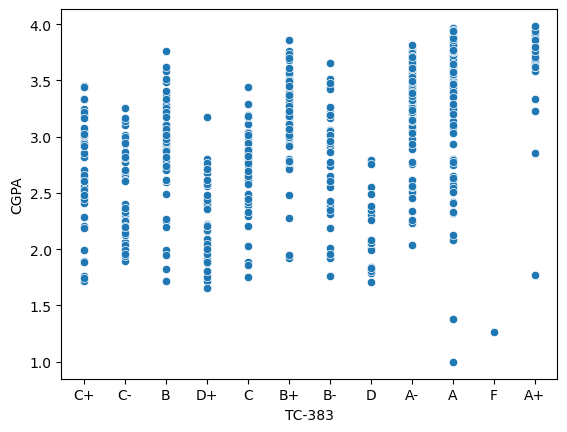

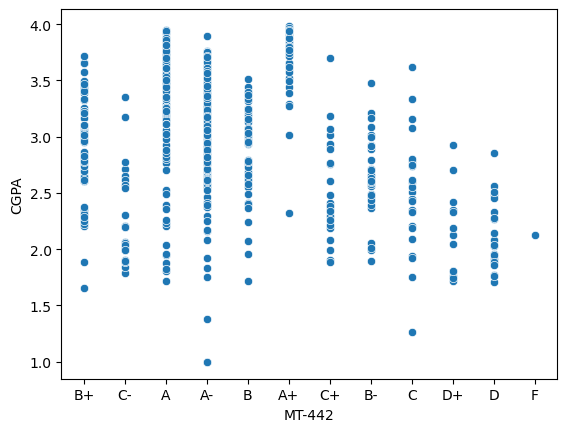

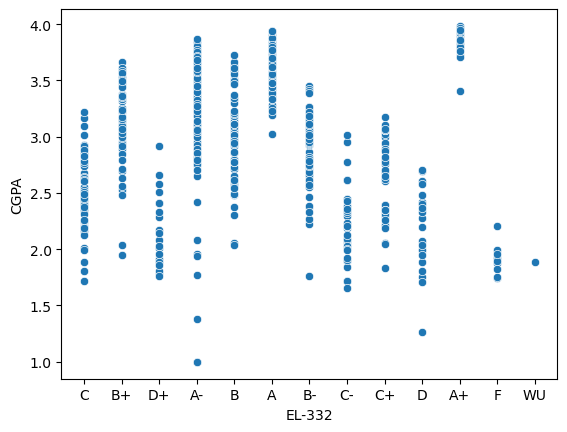

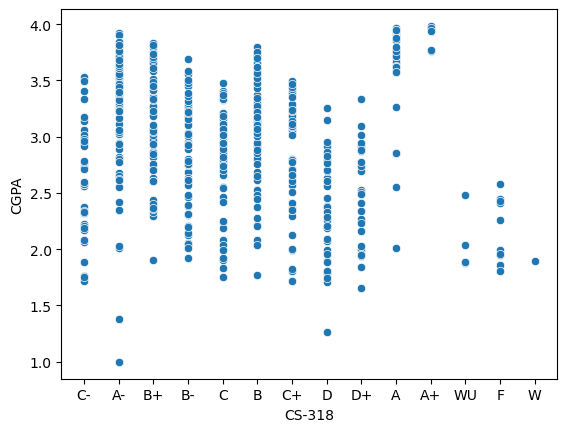

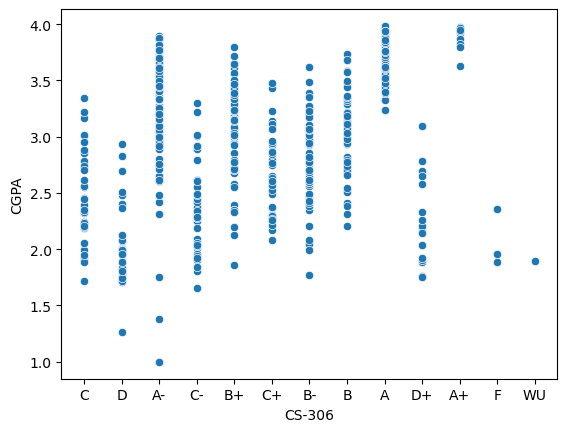

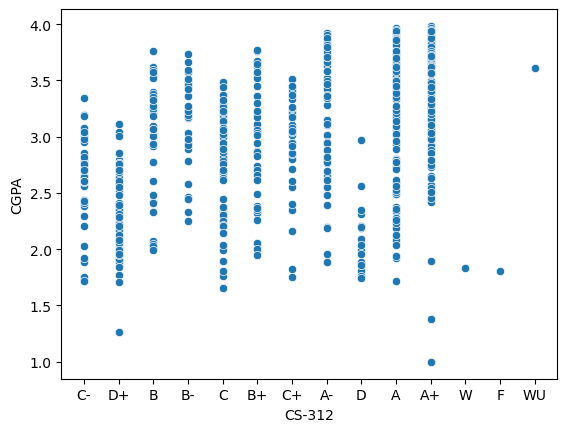

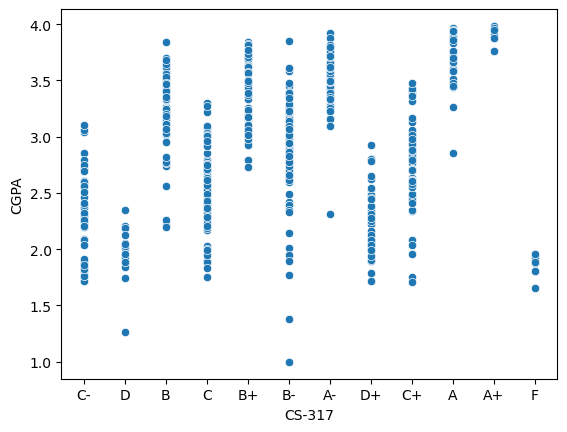

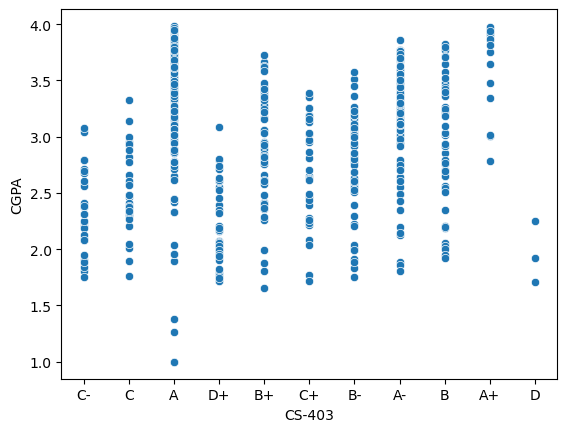

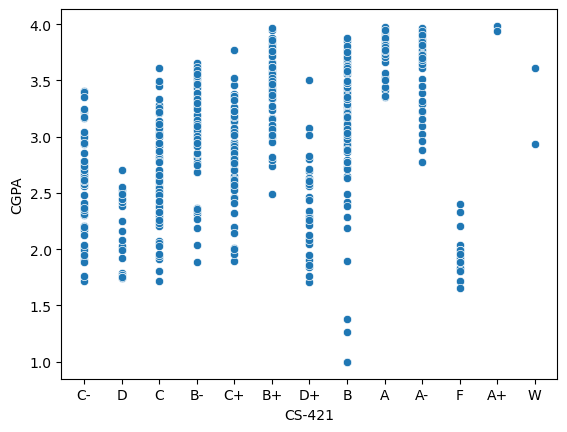

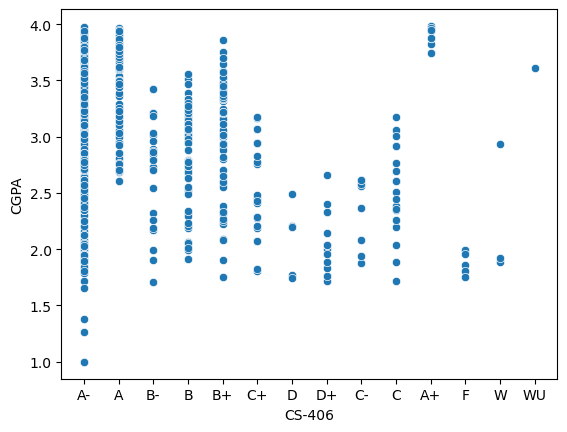

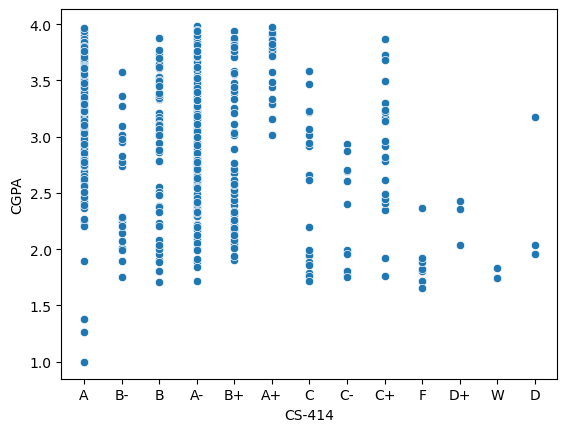

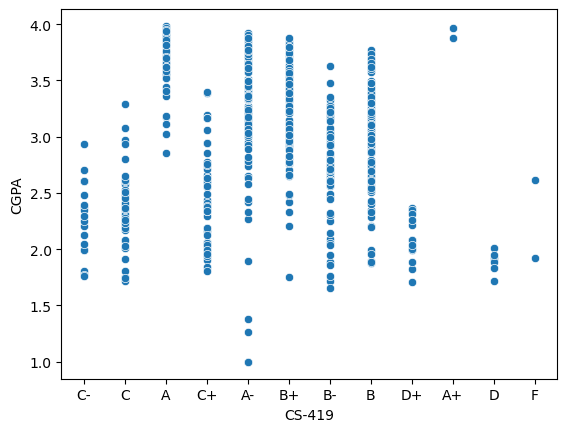

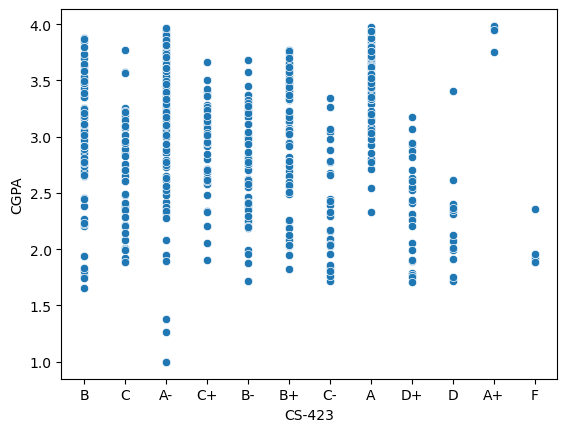

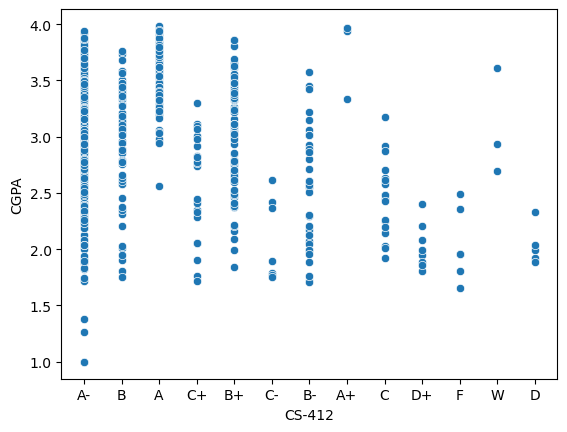

In [20]:
#So Next we, Will go with Bi variate Analysis.
col = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
for i in col:
    sns.scatterplot(x=df[i], y=df['CGPA'])
    plt.show()

We see that CGPA is high for those with A, A+, A-, B,B+ and The CGPA is less for those with C, D, WU, F grades.

#### Now we will convert the object data to int data using encoding techniques.

In [21]:
df.head(5)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
for i in df.drop(['CGPA'], axis=1):
    df[i]=le.fit_transform(df[i])

In [24]:
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         5      10       8          6       8      10       9       8   
1         0       9      10          9       5       6       9       0   
2         0       3       0          5       4       0       5       4   
3         9       7      10          9       9       2      10       8   
4         2       2       2          4       0       0       2       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       3       0       0          2       1       0       2       2   
567       1       0       0          0       0       0       0       2   
568       3       0       2          4       0       0       0       0   
569       0       4       9          0       9      10       5       8   
570       6       9       9          6       6      10       3       7   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         5       8  ...       8       8       8       8       2       0   
1        10       9  ...      10       9       6       9       2       5   
2         2       2  ...       3       3       0       6       0       0   
3         9       7  ...      10       6      10       8       5       3   
4         0       2  ...       5       4       4       5       2       0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       1       4  ...       2       2       0       0       0       4   
567       0       0  ...       4       4       0       0       2       3   
568       0       3  ...       2       3       0       4       0       6   
569       5       8  ...       9       3       3       8       9       6   
570       6      10  ...       7       6       5       9      11       8   

     CS-419  CS-423  CS-412   CGPA  
0         8       3       2  2.205  
1         6       6       3  2.008  
2         0       2       0  3.608  
3         7       7       7  1.906  
4         2       2       0  3.448  
..      ...     ...     ...    ...  
566       4       3       0  3.798  
567       2       6       2  3.772  
568       4       2       2  3.470  
569       3       5       6  2.193  
570       4       9       8  1.753  

[566 rows x 42 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     566 non-null    int32  
 1   HS-101     566 non-null    int32  
 2   CY-105     566 non-null    int32  
 3   HS-105/12  566 non-null    int32  
 4   MT-111     566 non-null    int32  
 5   CS-105     566 non-null    int32  
 6   CS-106     566 non-null    int32  
 7   EL-102     566 non-null    int32  
 8   EE-119     566 non-null    int32  
 9   ME-107     566 non-null    int32  
 10  CS-107     566 non-null    int32  
 11  HS-205/20  566 non-null    int32  
 12  MT-222     566 non-null    int32  
 13  EE-222     566 non-null    int32  
 14  MT-224     566 non-null    int32  
 15  CS-210     566 non-null    int32  
 16  CS-211     566 non-null    int32  
 17  CS-203     566 non-null    int32  
 18  CS-214     566 non-null    int32  
 19  EE-217     566 non-null    int32  
 20  CS-212    

We see now all the columns are converted to integers. So next we will go with Describe method.

In [26]:
df.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  566.000000  566.000000  566.000000  566.000000  566.000000  566.000000   
mean     3.734982    5.047703    2.860424    4.222615    3.901060    2.803887   
std      3.009203    2.777186    2.913494    3.177340    2.979119    2.668476   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    4.000000    7.000000    6.000000    4.000000   
max     11.000000   10.000000   11.000000   11.000000   12.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  566.000000  566.000000  566.000000  566.000000  ...  566.000000   
mean     4.120141    3.943463    3.872792    4.757951  ...    4.081272   
std      2.727062    3.016237    2.636316    3.125074  ...    3.354633   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    5.000000  ...    3.000000   
75%      5.000000    6.000000    6.000000    7.750000  ...    7.000000   
max     12.000000   12.000000   10.000000   12.000000  ...   13.000000   

           CS-317      CS-403     CS-421      CS-406      CS-414      CS-419  \
count  566.000000  566.000000  566.00000  566.000000  566.000000  566.000000   
mean     4.833922    3.446996    5.40636    2.992933    2.418728    3.872792   
std      2.752437    2.970626    2.73183    2.477499    2.500181    2.386852   
min      0.000000    0.000000    0.00000    0.000000    0.000000    0.000000   
25%      3.000000    1.000000    3.00000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.00000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.00000    4.000000    4.000000    5.000000   
max     11.000000   10.000000   12.00000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  566.000000  566.000000  566.000000  
mean     3.984099    3.058304    2.966125  
std      2.801661    2.340515    0.607360  
min      0.000000    0.000000    0.998000  
25%      2.000000    2.000000    2.555500  
50%      4.000000    2.000000    3.033000  
75%      6.000000    4.000000    3.451750  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

We see all counts are Same, there is right skewness since mean is greater than median value, there is huge difference between 75 percentile and max value there may be outliers. But, we dont consider all this for categorical columns. so we will see only CGPA.

In CGPA, mean and standard deviation is normal there is no huge skewness or outliers in our target column.


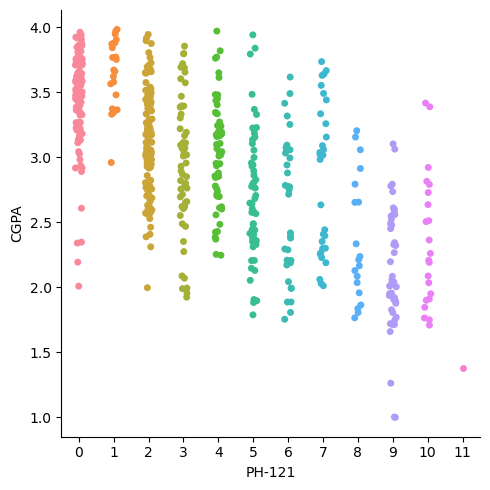

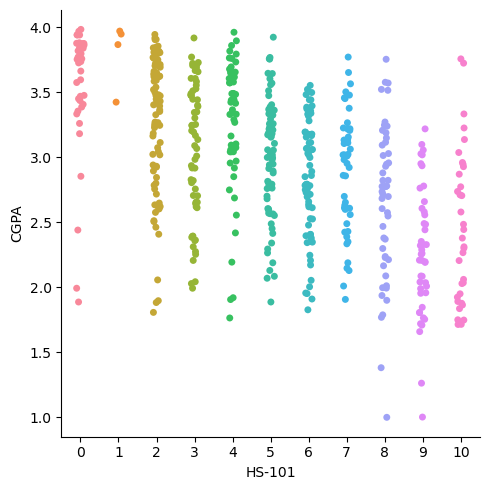

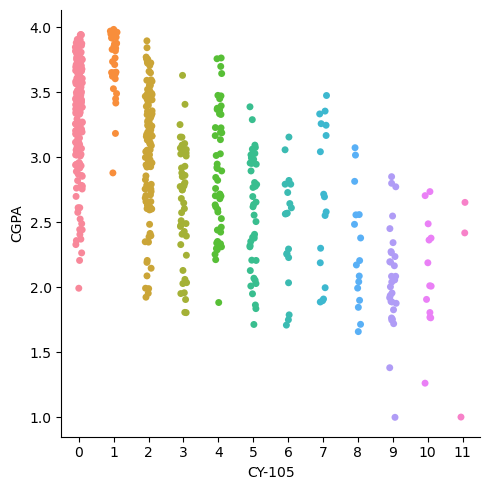

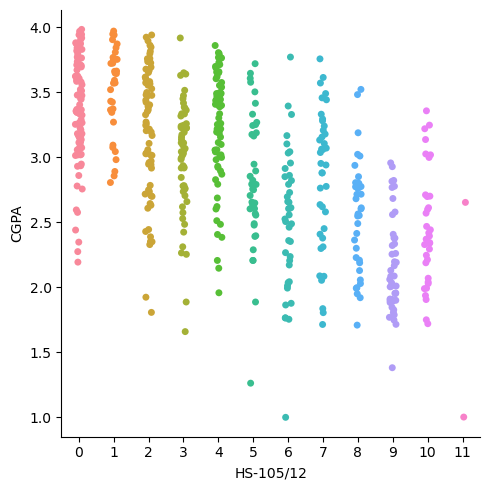

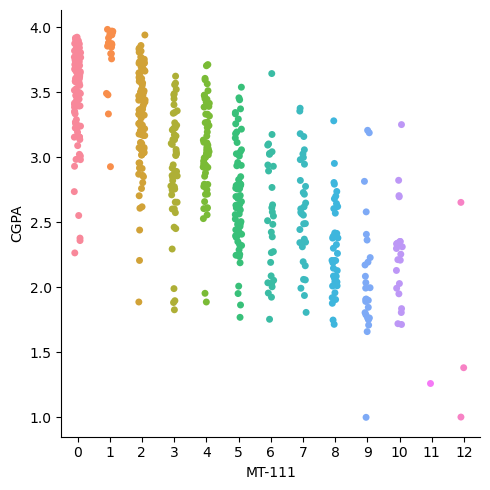

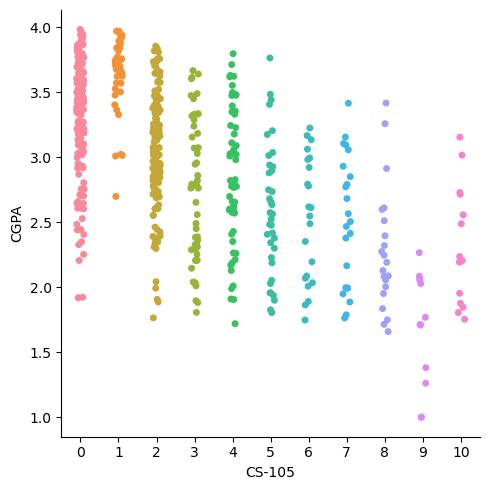

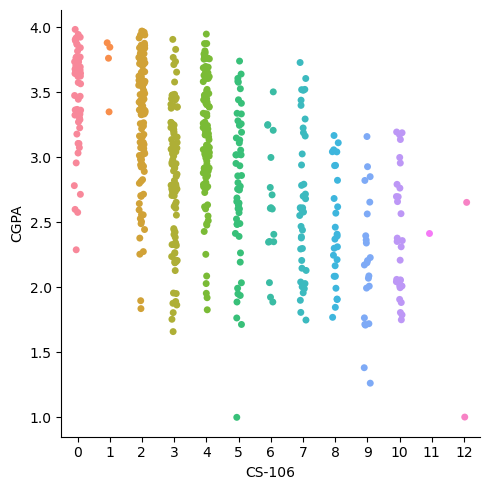

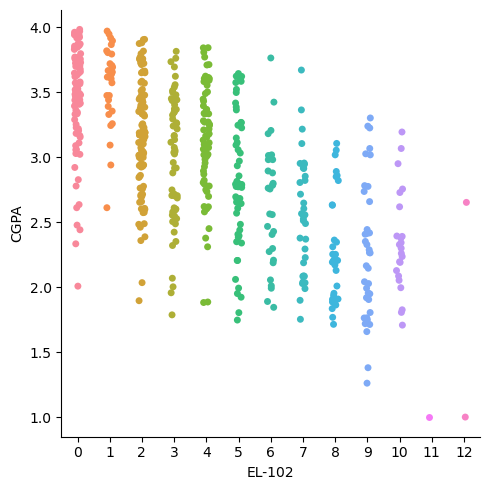

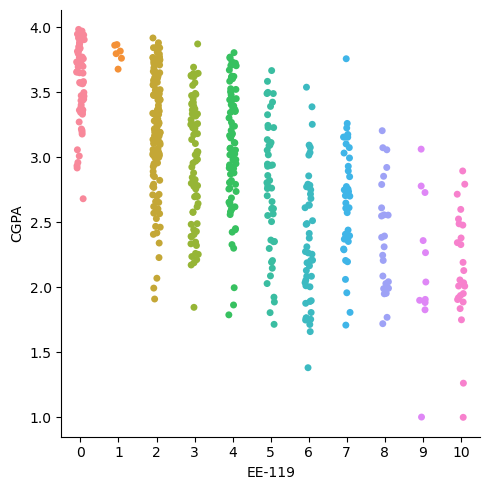

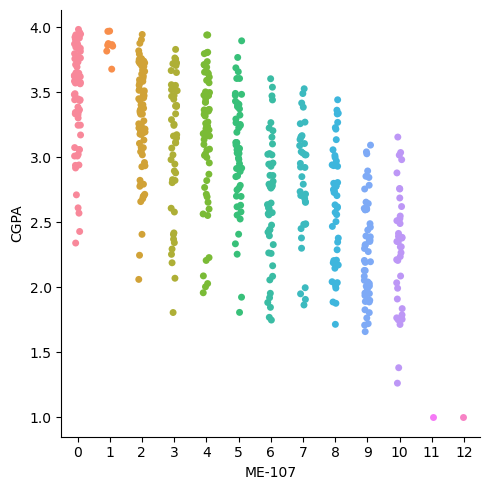

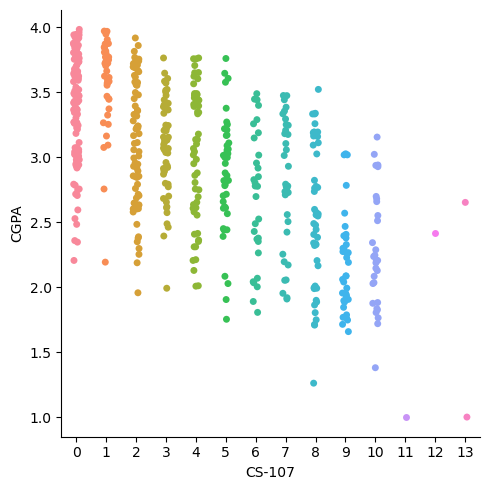

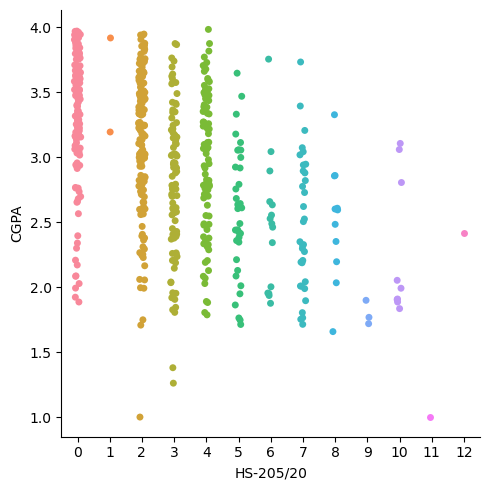

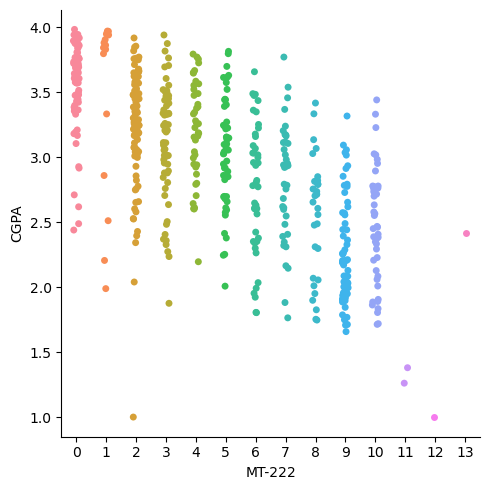

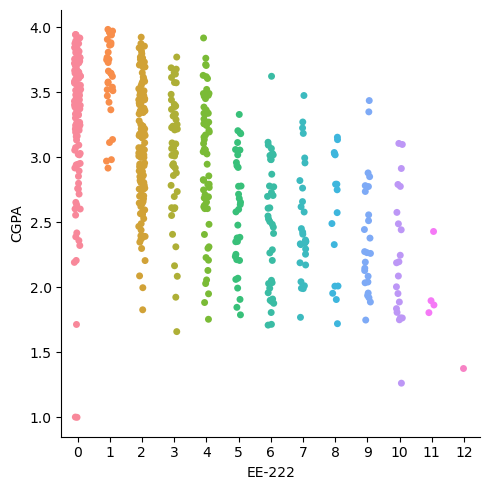

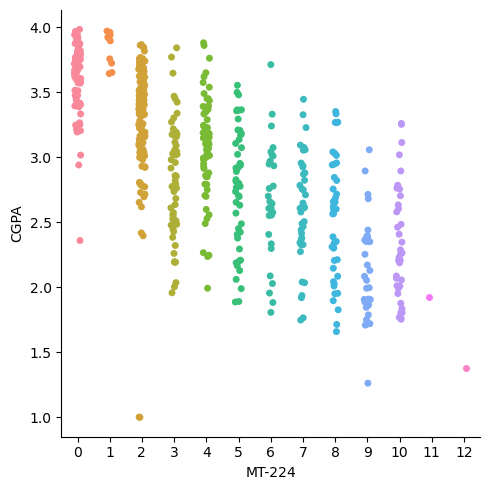

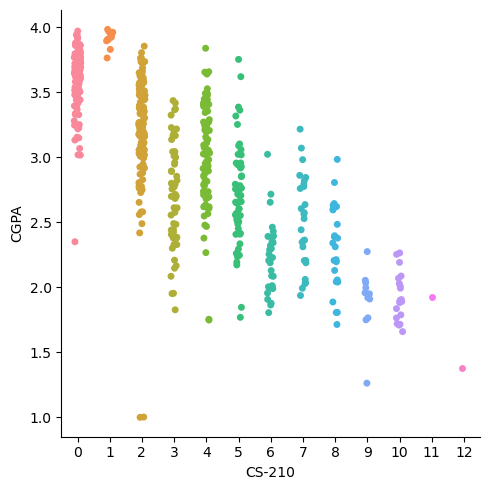

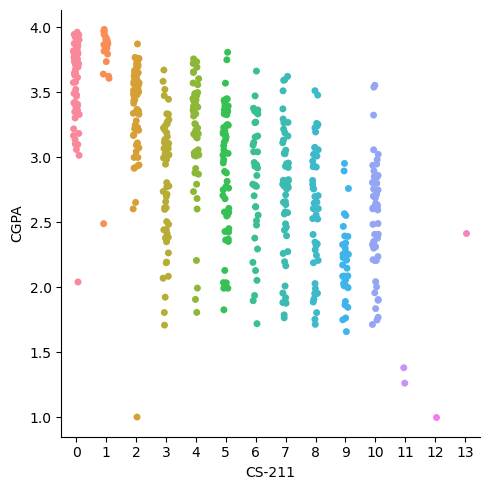

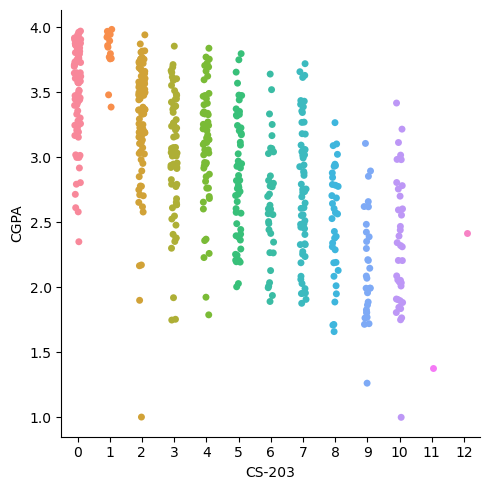

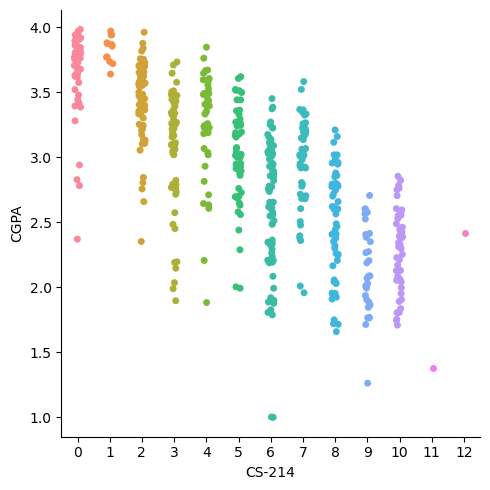

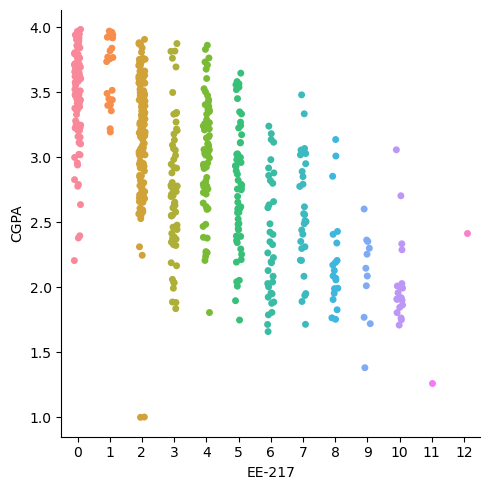

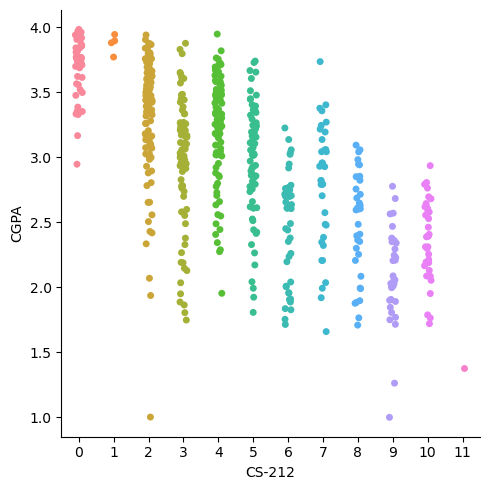

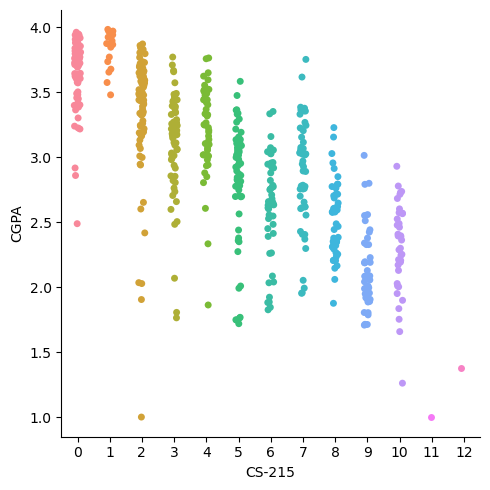

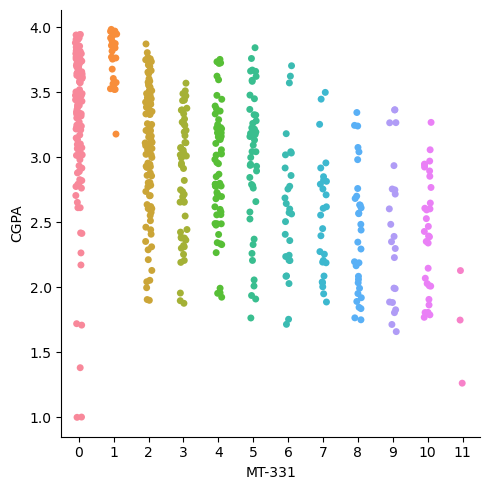

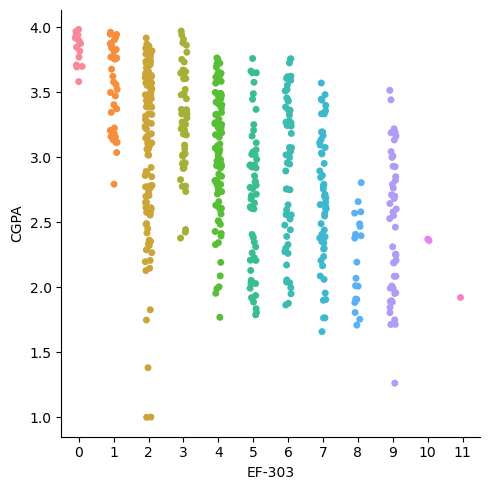

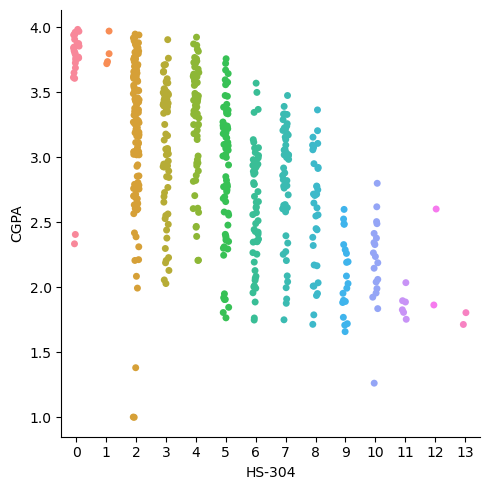

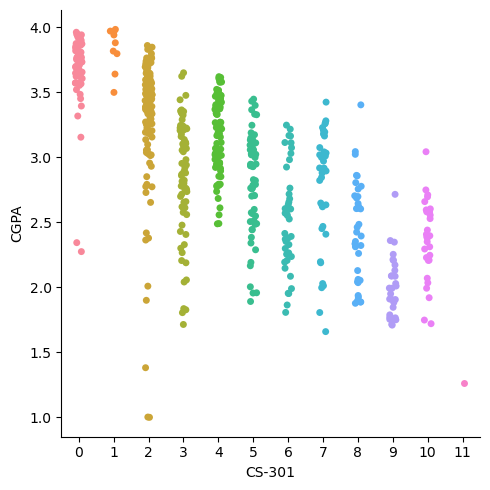

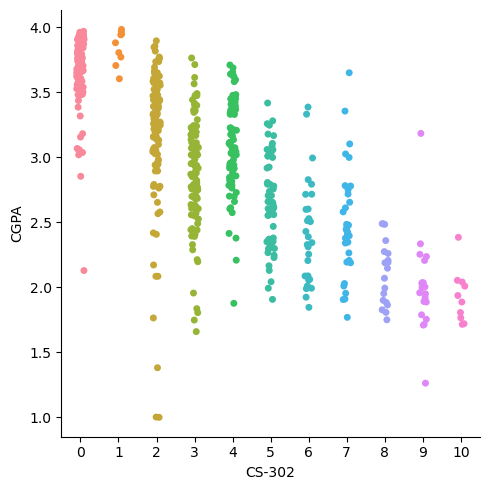

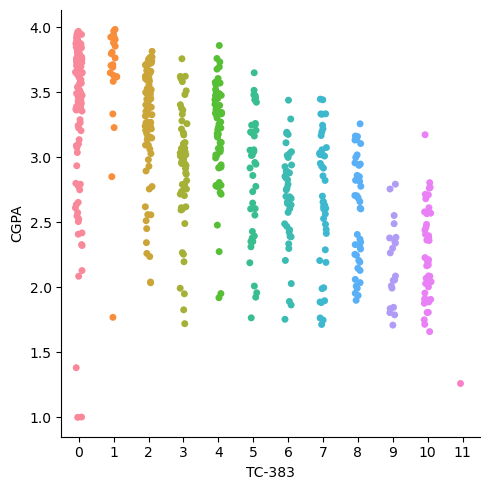

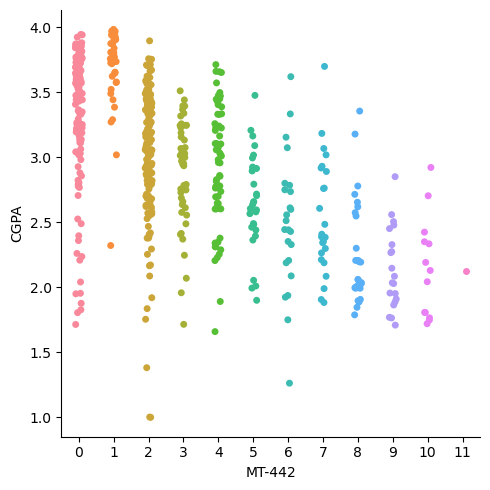

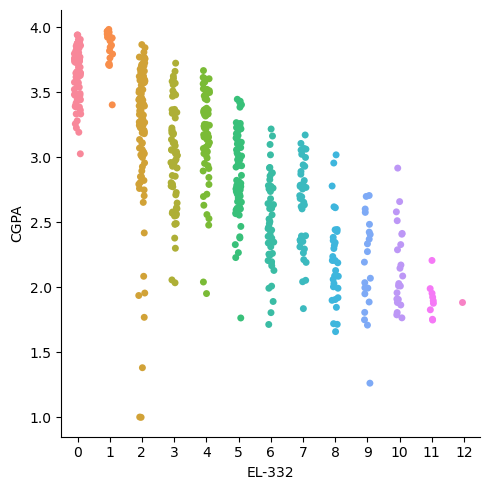

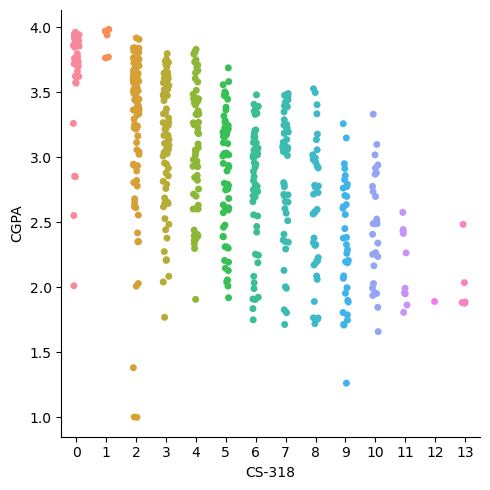

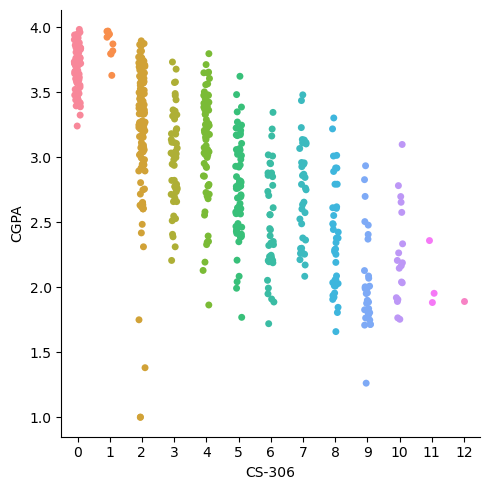

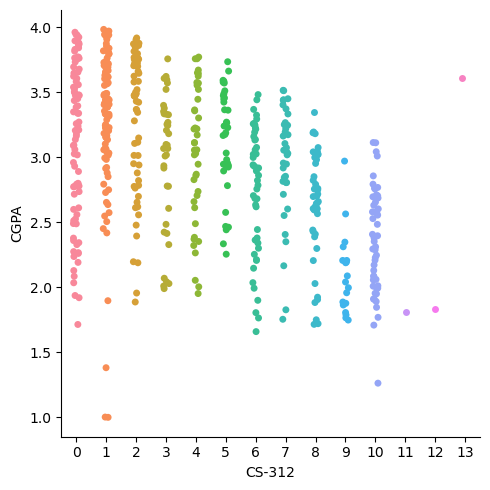

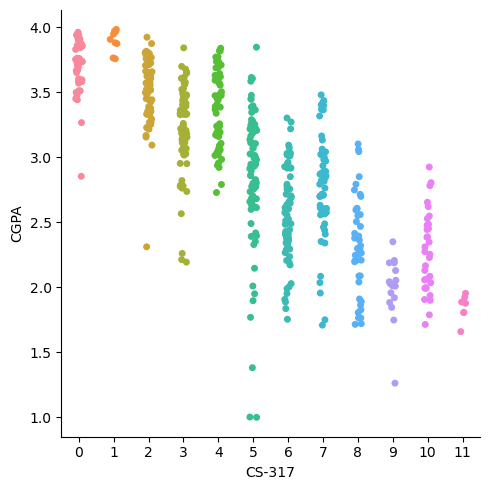

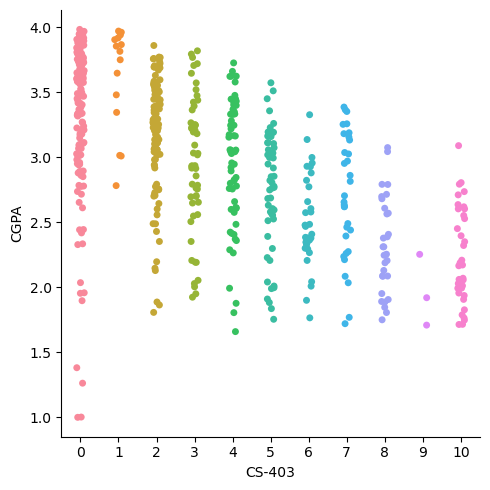

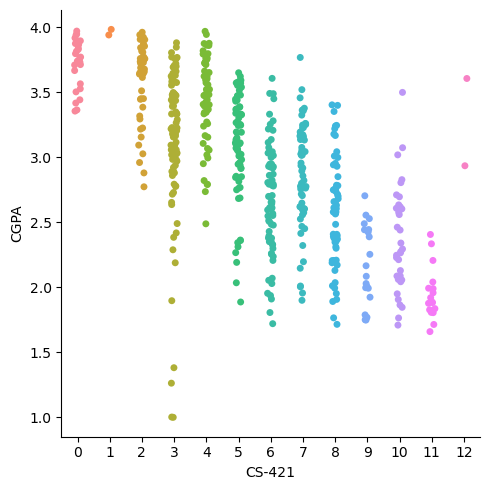

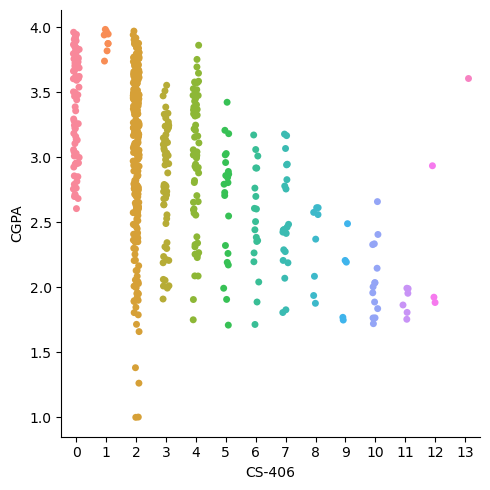

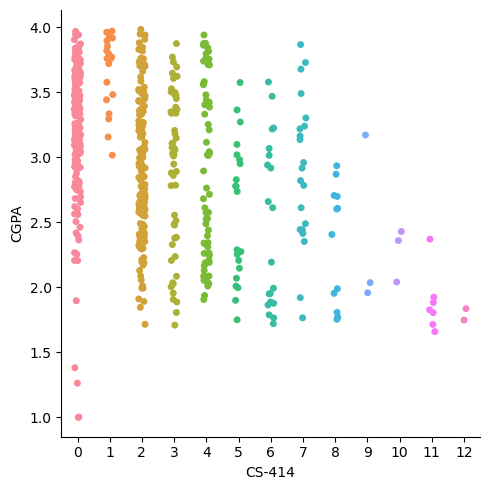

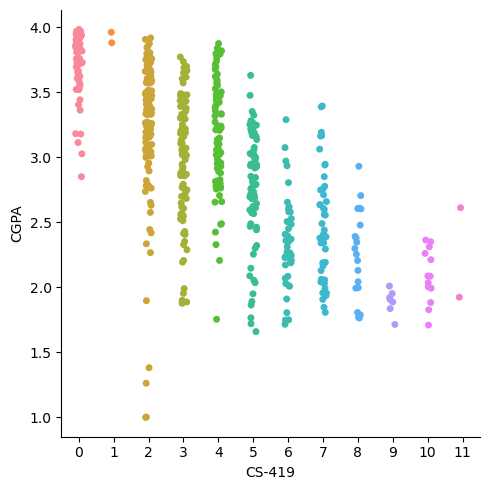

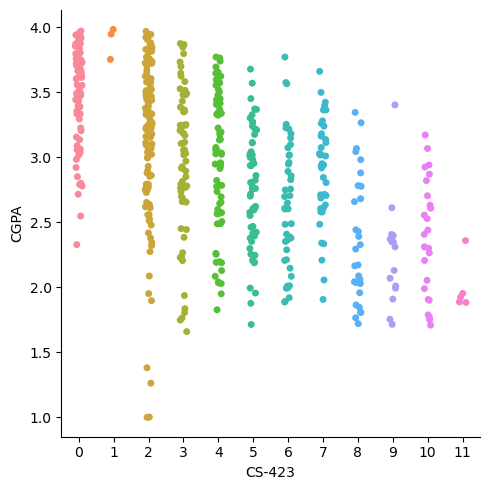

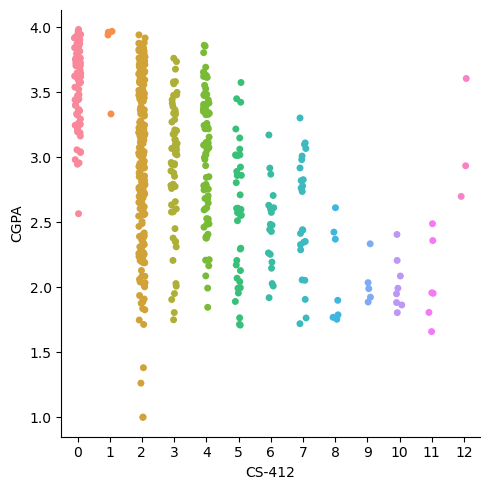

In [27]:
#So Next we, Will go with Bi variate Analysis.
col = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
for i in col:
    sns.catplot(x = i, y ='CGPA', data=df)
    plt.show()

We see that those who are getting grades 0, 1 and 2 are having highest CGPA compared to 10 and above. Those who are having grades 3 to 9 are having average CGPA between 2.5 to 3.5

So, next we will check for Outliers and also skewness

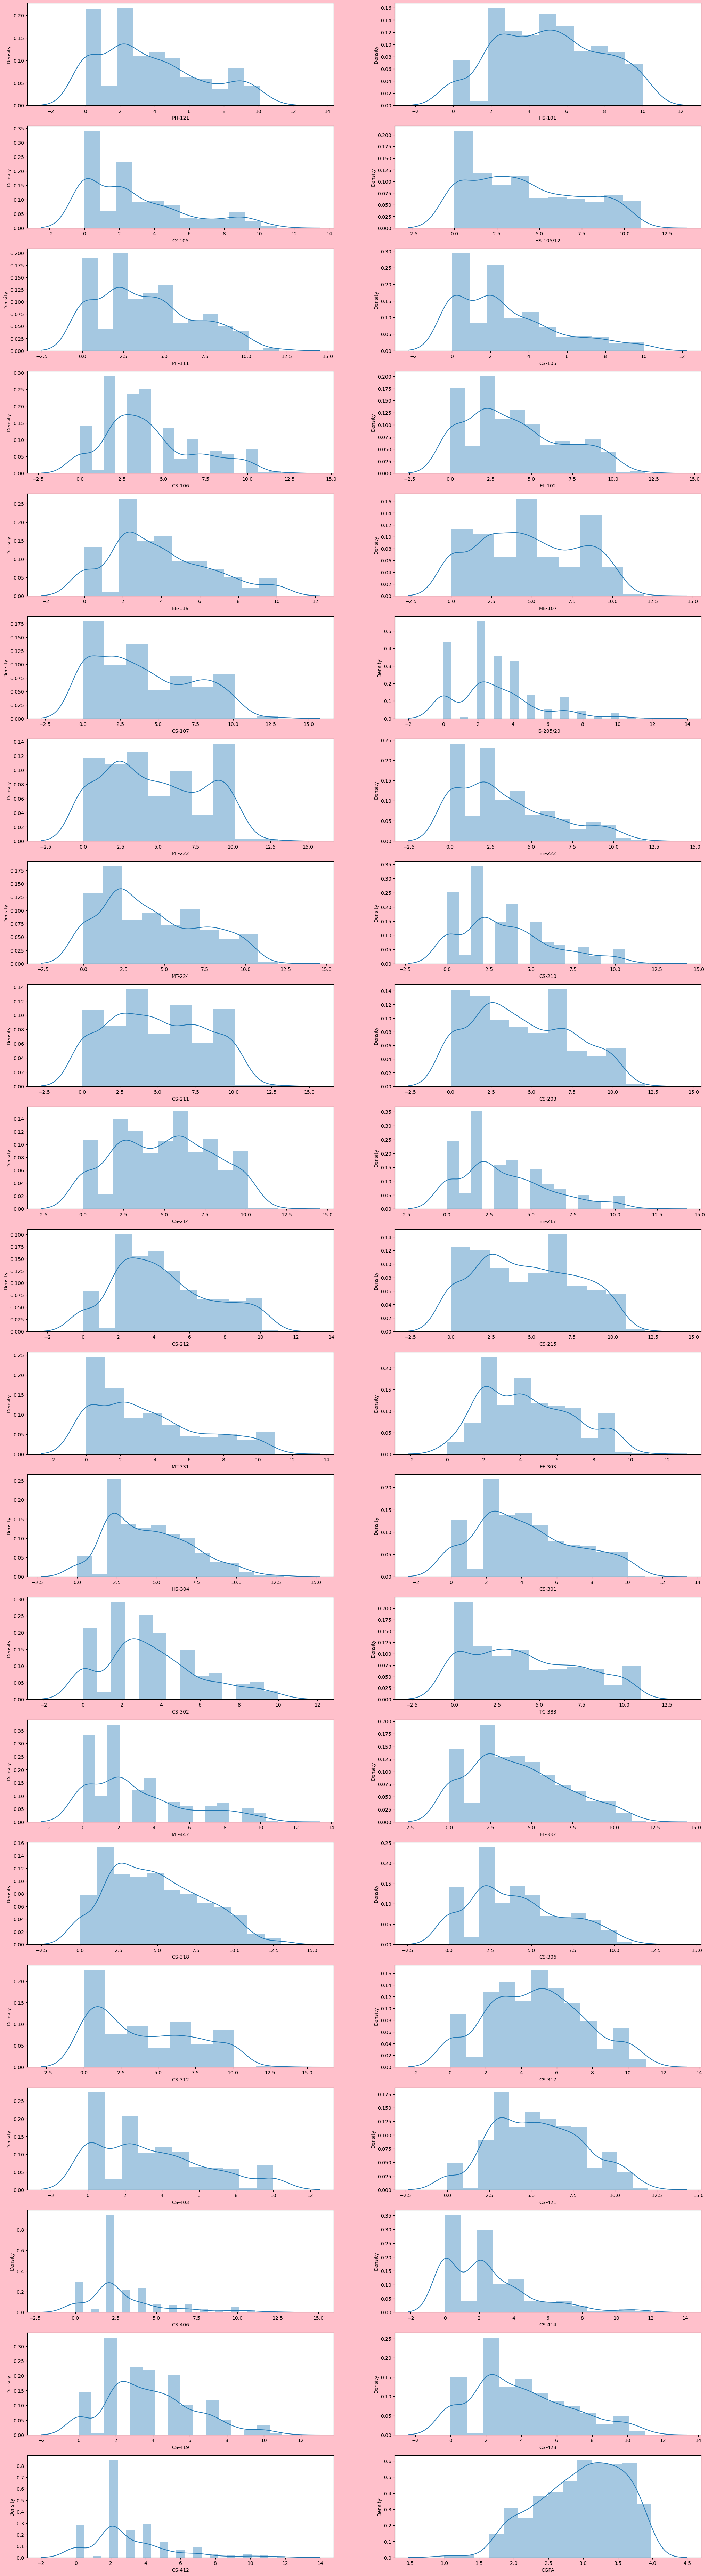

In [28]:
#check For Outliers
#plot BoxPlot
plt.figure(figsize =(25,100), facecolor = 'pink')
num = 1
for column in df:
    if num <=42:
        plt.subplot(22,2,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

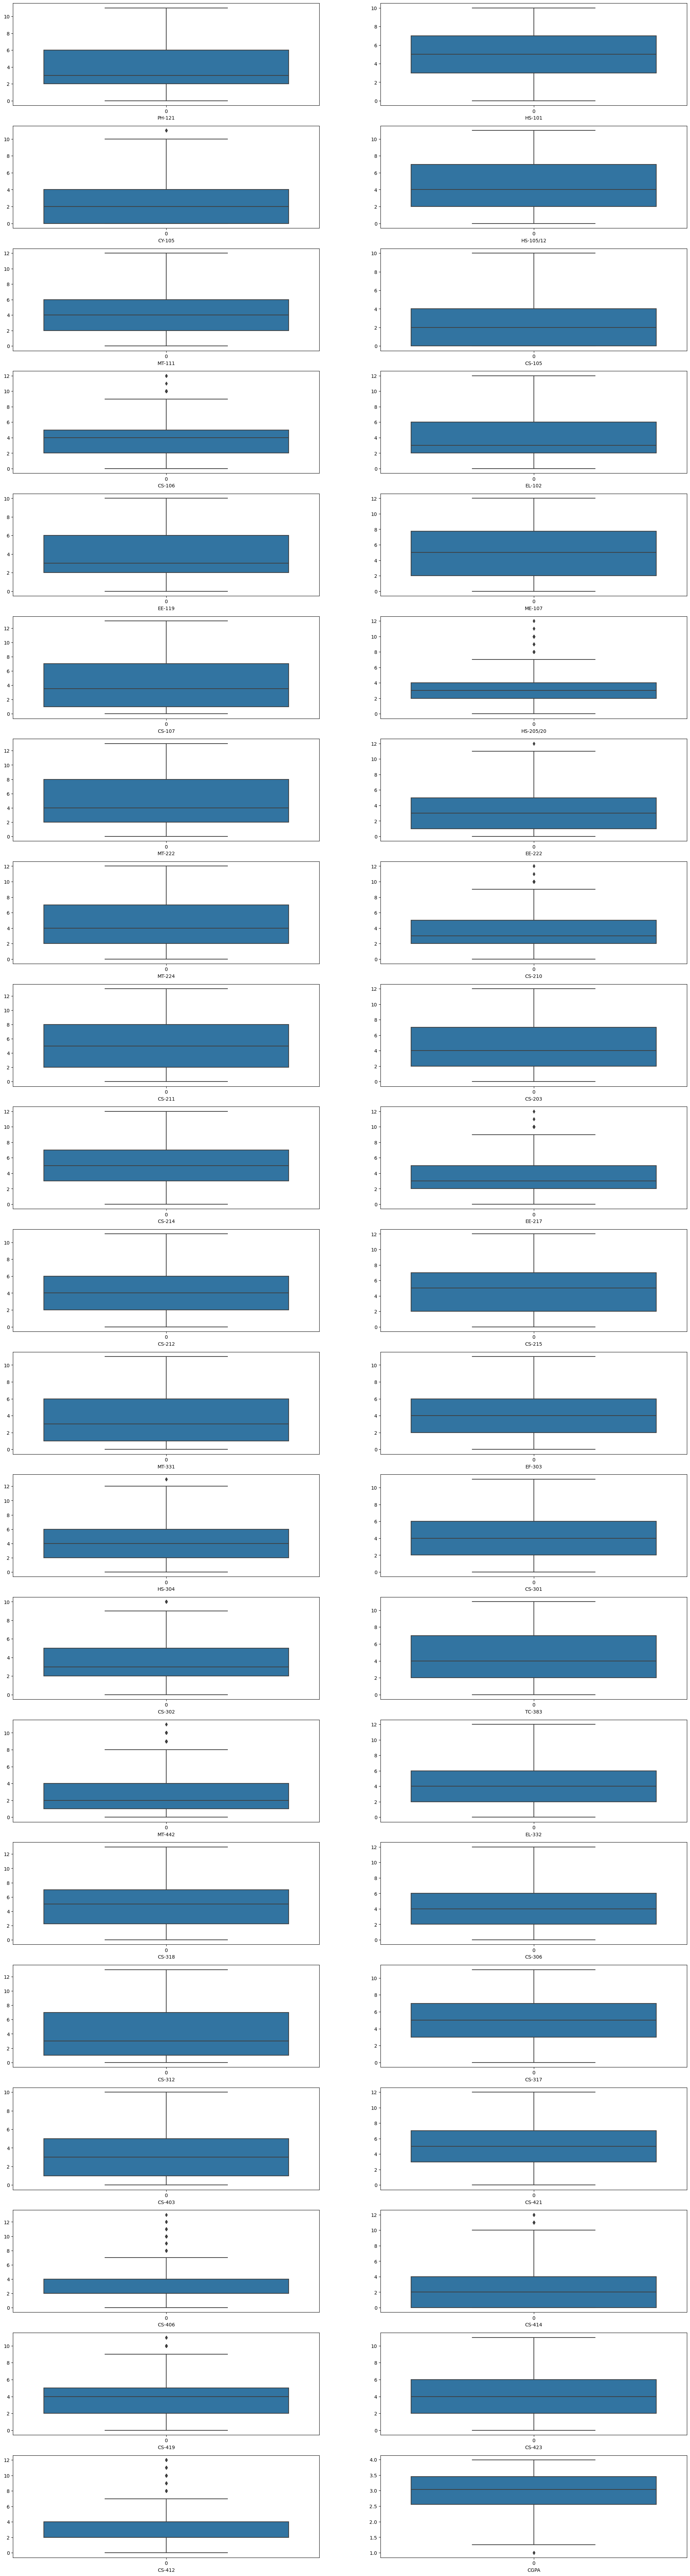

In [29]:
#check For Outliers
#plot BoxPlot
plt.figure(figsize =(25,100), facecolor = 'white')
num = 1
for column in df:
    if num <=42:
        plt.subplot(22,2,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

We see there is a skewness and also Outliers But we dont handle skewness and Outliers since all columns are Categorical.

#### Next we will check with the correlation

In [30]:
df.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.371927  0.554971   0.499322  0.475047  0.599651   
HS-101     0.371927  1.000000  0.324781   0.468748  0.435264  0.390075   
CY-105     0.554971  0.324781  1.000000   0.496642  0.542656  0.576761   
HS-105/12  0.499322  0.468748  0.496642   1.000000  0.492224  0.481732   
MT-111     0.475047  0.435264  0.542656   0.492224  1.000000  0.398304   
CS-105     0.599651  0.390075  0.576761   0.481732  0.398304  1.000000   
CS-106     0.296777  0.312395  0.380811   0.503280  0.512337  0.290239   
EL-102     0.425786  0.352967  0.450249   0.361813  0.563102  0.362553   
EE-119     0.581384  0.309533  0.479745   0.407173  0.405385  0.506417   
ME-107     0.535396  0.336802  0.470209   0.320937  0.473267  0.453161   
CS-107     0.486640  0.503340  0.481100   0.541619  0.493510  0.518696   
HS-205/20  0.292270  0.173137  0.253846   0.171868  0.317846  0.187744   
MT-222     0.560972  0.393439  0.487531   0.458141  0.494914  0.484594   
EE-222     0.538649  0.383320  0.395345   0.375267  0.384038  0.496552   
MT-224     0.348755  0.264977  0.441785   0.390526  0.561123  0.260240   
CS-210     0.514830  0.318904  0.484920   0.456205  0.569817  0.440999   
CS-211     0.335069  0.337611  0.456952   0.350251  0.551575  0.348112   
CS-203     0.469018  0.261813  0.394945   0.288505  0.510253  0.414943   
CS-214     0.415913  0.458579  0.462707   0.412290  0.586908  0.411336   
EE-217     0.424234  0.325446  0.388650   0.349887  0.512102  0.337890   
CS-212     0.355741  0.341076  0.420412   0.452583  0.561605  0.324597   
CS-215     0.491841  0.402993  0.514515   0.450097  0.573025  0.462021   
MT-331     0.203469  0.182330  0.378399   0.262545  0.441078  0.247760   
EF-303     0.215278  0.251715  0.356067   0.396260  0.414307  0.213173   
HS-304     0.444131  0.431076  0.344257   0.356194  0.317380  0.477650   
CS-301     0.318958  0.323393  0.387920   0.426562  0.542890  0.244983   
CS-302     0.466047  0.353767  0.479449   0.428706  0.510851  0.442011   
TC-383     0.213862  0.336460  0.326481   0.412978  0.498931  0.236460   
MT-442     0.457714  0.231594  0.445265   0.326985  0.407361  0.419215   
EL-332     0.437595  0.386590  0.362332   0.358282  0.576310  0.374042   
CS-318     0.464654  0.415343  0.332763   0.379169  0.376928  0.463134   
CS-306     0.491878  0.441233  0.373718   0.491721  0.480233  0.433484   
CS-312     0.051054  0.220717  0.268269   0.265643  0.476674  0.068810   
CS-317     0.470990  0.366411  0.481781   0.484081  0.559411  0.392684   
CS-403     0.344915  0.239406  0.480635   0.459731  0.418593  0.296647   
CS-421     0.309808  0.312846  0.370275   0.427554  0.515798  0.252287   
CS-406     0.291279  0.271177  0.138157   0.172653  0.302294  0.246624   
CS-414     0.170511  0.236982  0.021644   0.150890  0.229890  0.137015   
CS-419     0.483947  0.294357  0.450986   0.476801  0.506496  0.322589   
CS-423     0.107616  0.236443  0.133079   0.242568  0.403564  0.055216   
CS-412     0.306017  0.231837  0.072313   0.157949  0.271417  0.188585   
CGPA      -0.651945 -0.528936 -0.657249  -0.618255 -0.750387 -0.598811   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.296777  0.425786  0.581384  0.535396  ...  0.051054  0.470990   
HS-101     0.312395  0.352967  0.309533  0.336802  ...  0.220717  0.366411   
CY-105     0.380811  0.450249  0.479745  0.470209  ...  0.268269  0.481781   
HS-105/12  0.503280  0.361813  0.407173  0.320937  ...  0.265643  0.484081   
MT-111     0.512337  0.563102  0.405385  0.473267  ...  0.476674  0.559411   
CS-105     0.290239  0.362553  0.506417  0.453161  ...  0.068810  0.392684   
CS-106     1.000000  0.343600  0.284010  0.296456  ...  0.458807  0.418374   
EL-102     0.343600  1.000000  0.456053  0.471162  ...  0.311114  0.470659   
EE-119     0.284010  0.456053  1.000000  0.567058  ...  0.168278  0.450763   
ME-107     0.296456  0.471162  0.567058  1.000000 

#### Since we have huge number of columns its difficult to understand with vallues. So, we go with the graphical representation of correlation.

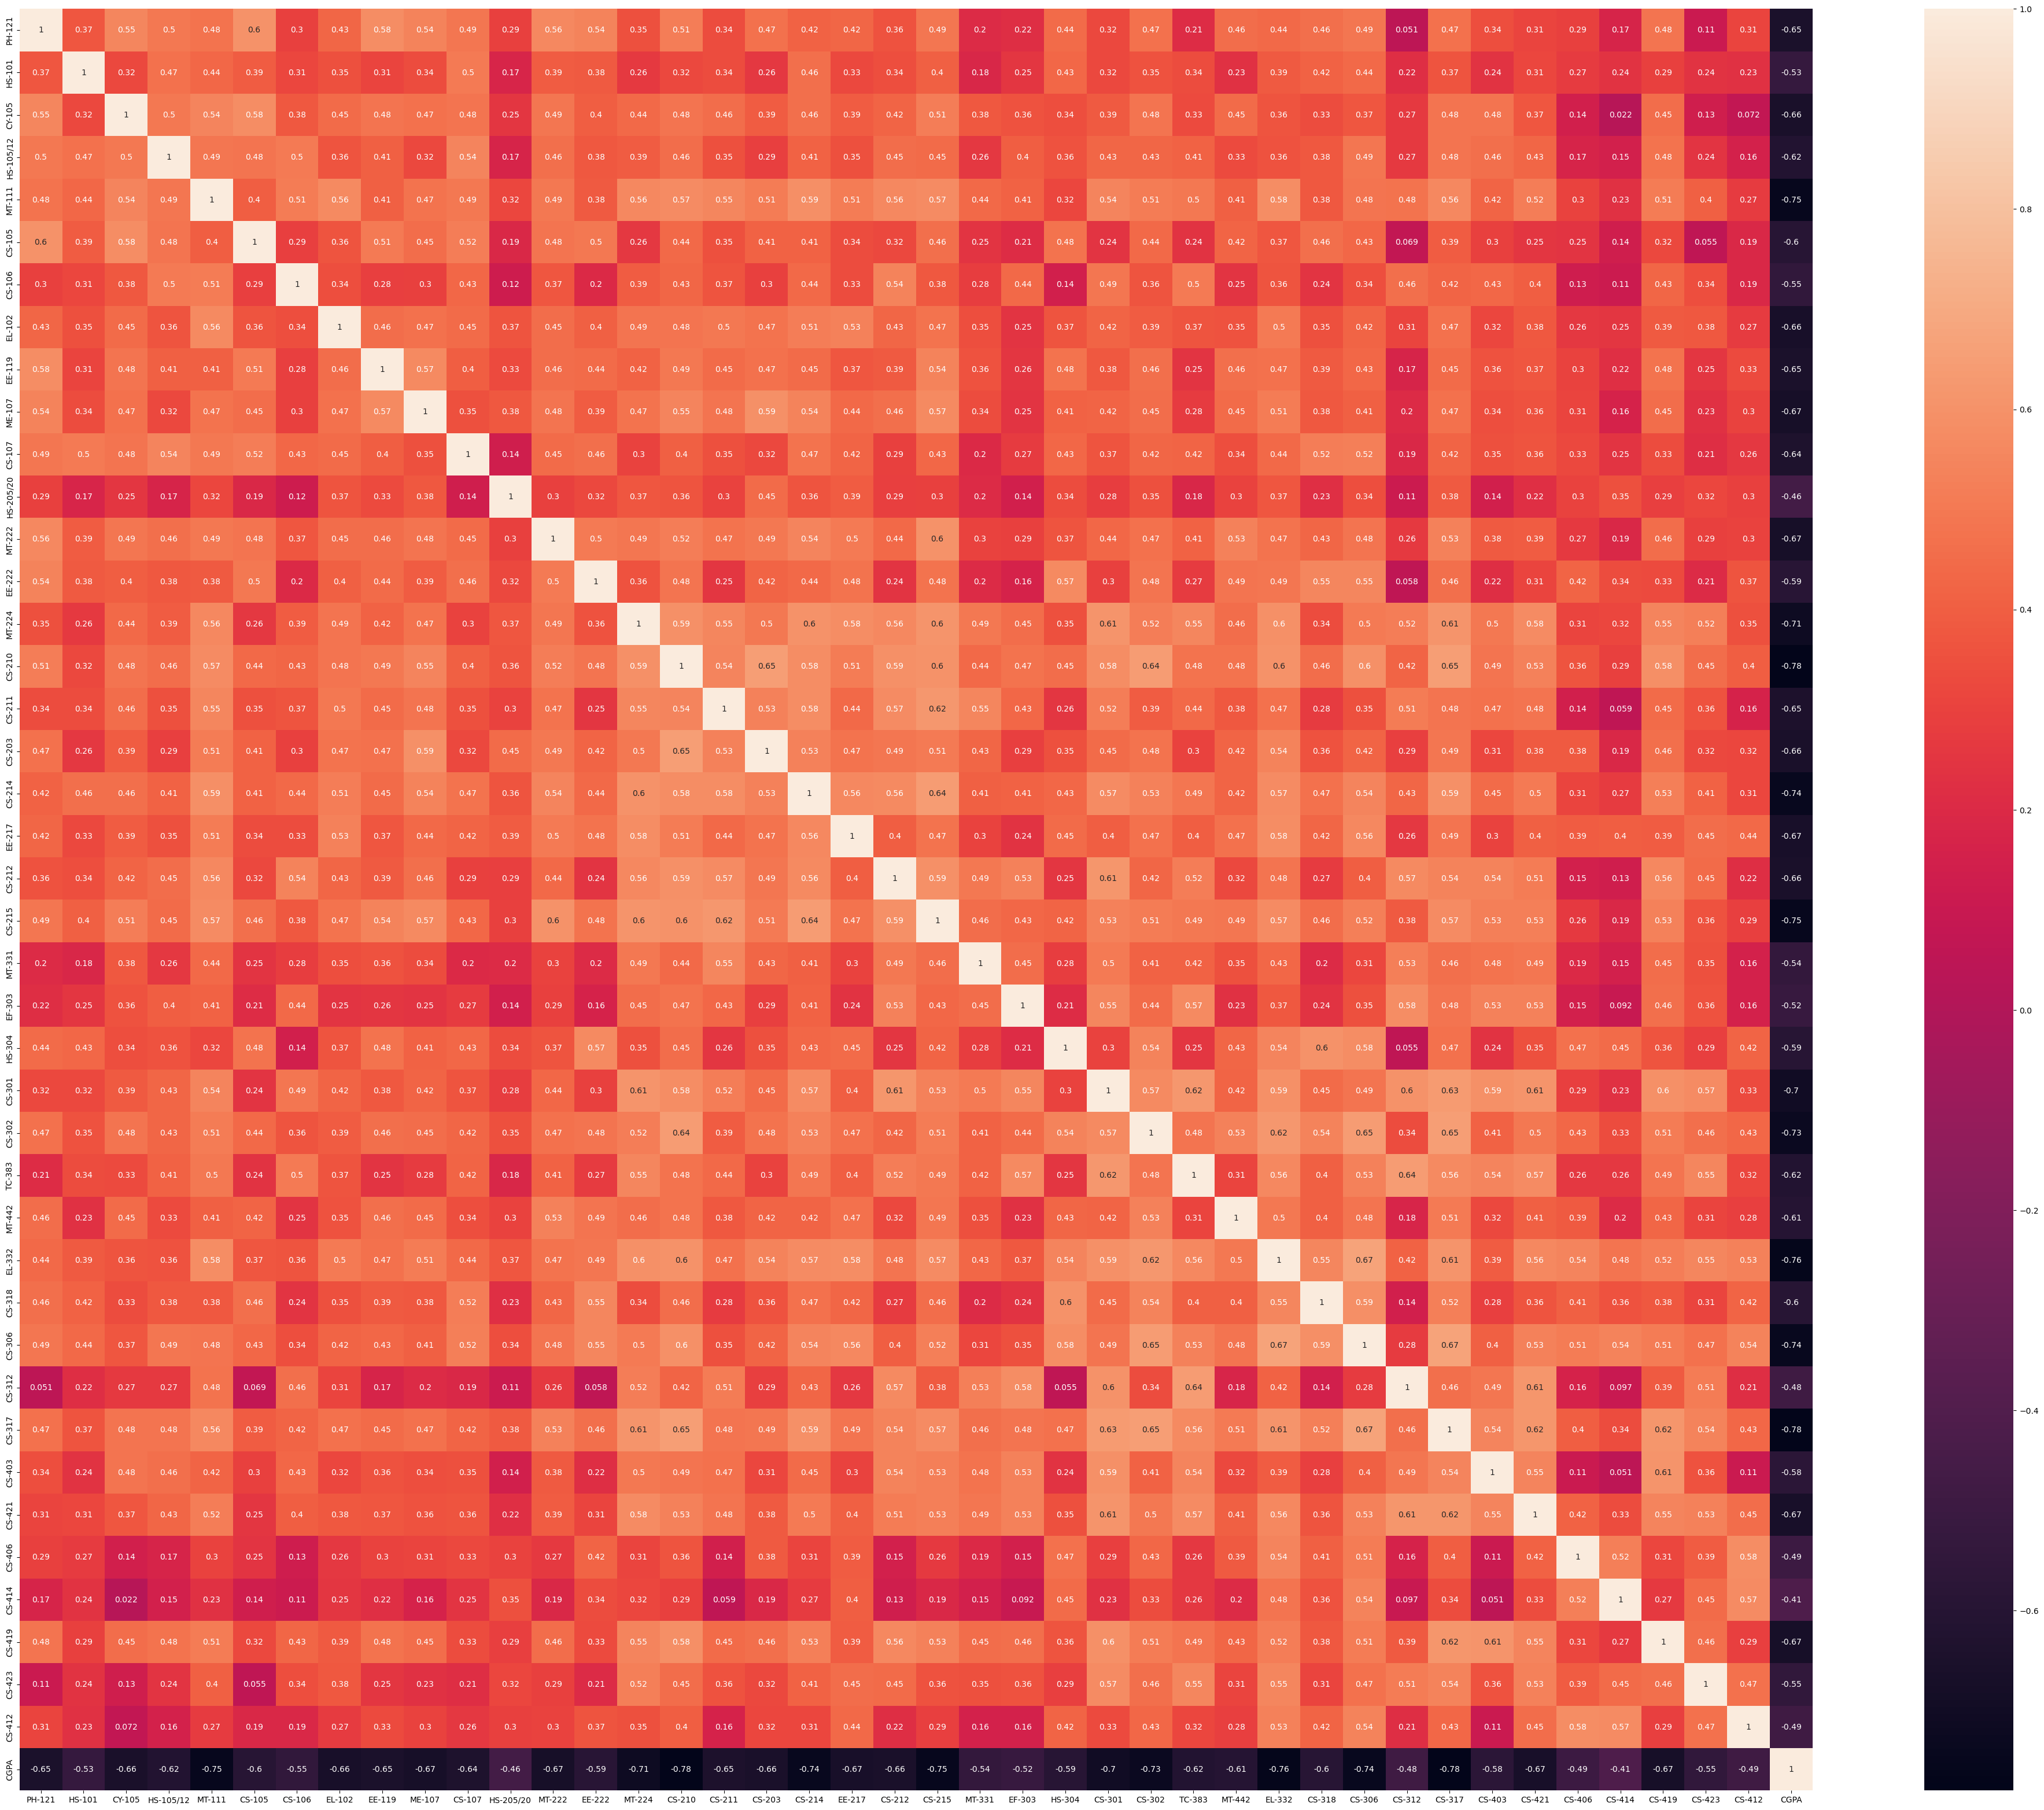

In [31]:
plt.figure(figsize = (50,40))
sns.heatmap(df.corr(), annot = True,)
plt.show()

We see that all the columns are negatively corelated with the target and all the features are almost corelated with each other but they are not highly correlated.the highest correlation percent among the features is 0.67 between CS-306 with CS-317 and EL-332.

#### Next we will scale the data using standard Scaler


In [32]:
x = df.drop(['CGPA'], axis = 1)
y=df['CGPA']

In [33]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
x_sr = pd.DataFrame(sr.fit_transform(x), columns = x.columns)
x_sr

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.420755  1.784784  1.765620   0.559889  1.377107  2.699098  1.791003   
1   -1.242284  1.424389  2.452688   1.504910  0.369207  1.198789  1.791003   
2   -1.242284 -0.737982 -0.982653   0.244882  0.033241 -1.051674  0.322925   
3    1.751186  0.703598  2.452688   1.504910  1.713074 -0.301520  2.158022   
4   -0.577069 -1.098377 -0.295585  -0.070125 -1.310626 -1.051674 -0.778133   
..        ...       ...       ...        ...       ...       ...       ...   
561 -0.244461 -1.819168 -0.982653  -0.700139 -0.974659 -1.051674 -0.778133   
562 -0.909676 -1.819168 -0.982653  -1.330154 -1.310626 -1.051674 -1.512172   
563 -0.244461 -1.819168 -0.295585  -0.070125 -1.310626 -1.051674 -1.512172   
564 -1.242284 -0.377587  2.109154  -1.330154  1.713074  2.699098  0.322925   
565  0.753363  1.424389  2.109154   0.559889  0.705174  2.699098 -0.411114   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0    1.346090  0.427948  1.038349  ...  0.659195  1.169187  1.151299   
1   -1.308568  2.326212  1.358624  ...  1.709207  1.765905  1.514935   
2    0.018761 -0.711010 -0.883304  ... -0.740821 -0.322607 -0.666880   
3    1.346090  1.946559  0.718073  ...  1.359203  1.765905  0.424028   
4    0.018761 -1.470316 -0.883304  ... -0.740821  0.274111 -0.303244   
..        ...       ...       ...  ...       ...       ...       ...   
561 -0.644904 -1.090663 -0.242753  ... -0.040813 -0.620966 -1.030516   
562 -0.644904 -1.470316 -1.523855  ... -0.740821 -0.024248 -0.303244   
563 -1.308568 -1.470316 -0.563028  ... -0.040813 -0.620966 -0.666880   
564  1.346090  0.427948  1.038349  ... -0.040813  1.467546 -0.666880   
565  1.014258  0.807601  1.678900  ...  2.059211  0.870829  0.424028   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.534030  0.950254 -0.401135 -0.968277  1.730672 -0.351566 -0.452567  
1    0.860176  1.316633 -0.401135  1.033347  0.892008  0.720174 -0.024933  
2   -1.161387  0.217497 -1.209114 -0.968277 -1.623987 -0.708813 -1.307836  
3    2.207885  0.950254  0.810835  0.232698  1.311340  1.077421  1.685605  
4    0.186322 -0.148882 -0.401135 -0.968277 -0.785322 -0.708813 -1.307836  
..        ...       ...       ...       ...       ...       ...       ...  
561 -1.161387 -1.980775 -1.209114  0.633022  0.053343 -0.351566 -1.307836  
562 -1.161387 -1.980775 -0.401135  0.232698 -0.785322  0.720174 -0.452567  
563 -1.161387 -0.515261 -1.209114  1.433672  0.053343 -0.708813 -0.452567  
564 -0.150605  0.950254  2.426794  1.433672 -0.365990  0.362927  1.257970  
565  0.523249  1.316633  3.234774  2.234322  0.053343  1.791915  2.113239  

[566 rows x 41 columns]

### Model Building

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
accuracy = 0
r_state =0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_sr, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("max r2 score is ", accuracy , "randomstate = ",r_state)


max r2 score is  0.9805635796318616 randomstate =  178


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_sr, y, test_size = 0.30, random_state = 178)

In [37]:
x_train.shape

(396, 41)

In [38]:
x_test.shape

(170, 41)

In [39]:
y_test.shape

(170,)

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)
lr_r2_train = r2_score(y_train, lr_pred_train)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print("Linear Regression")
print("r2Score of train data is  ",lr_r2_train)
print("r2Score of test data is  ",lr_r2)
print("Mean absolute error of test data is  ", lr_mae)
print("Mean squared error of test data is  ", lr_mse)
print("Root Mean squared error of test data is  ", lr_rmse)
print("\n\n")


ls = Lasso()
ls.fit(x_train,y_train)
ls_pred = ls.predict(x_test)
ls_pred_train = ls.predict(x_train)
ls_r2_train = r2_score(y_train, ls_pred_train)
ls_r2 = r2_score(y_test, ls_pred)
ls_mae = mean_absolute_error(y_test, ls_pred)
ls_mse = mean_squared_error(y_test, ls_pred)
ls_rmse = np.sqrt(mean_squared_error(y_test, ls_pred))
print("Lasso Regression")
print("r2Score of train data is  ",ls_r2_train)
print("r2Score of test data is  ",ls_r2)
print("Mean absolute error of test data is  ", ls_mae)
print("Mean squared error of test data is  ", ls_mse)
print("Root Mean squared error of test data is  ", ls_rmse)
print("\n\n")

rg = Ridge()
rg.fit(x_train,y_train)
rg_pred = rg.predict(x_test)
rg_pred_train = rg.predict(x_train)
rg_r2_train = r2_score(y_train, rg_pred_train)
rg_r2 = r2_score(y_test, rg_pred)
rg_mae = mean_absolute_error(y_test, rg_pred)
rg_mse = mean_squared_error(y_test, rg_pred)
rg_rmse = np.sqrt(mean_squared_error(y_test, rg_pred))
print("Ridge Regression")
print("r2Score of train data is  ",rg_r2_train)
print("r2Score of test data is  ",rg_r2)
print("Mean absolute error of test data is  ", rg_mae)
print("Mean squared error of test data is  ", rg_mse)
print("Root Mean squared error of test data is  ", rg_rmse)
print("\n\n")

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
gbr_pred_train = gbr.predict(x_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
print("Gradient Boosting Regressor")
print("r2Score of train data is  ",gbr_r2_train)
print("r2Score of test data is  ",gbr_r2)
print("Mean absolute error of test data is  ", gbr_mae)
print("Mean squared error of test data is  ", gbr_mse)
print("Root Mean squared error of test data is  ", gbr_rmse)
print("\n\n")

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_test)
abr_pred_train = abr.predict(x_train)
abr_r2_train = r2_score(y_train, abr_pred_train)
abr_r2 = r2_score(y_test, abr_pred)
abr_mae = mean_absolute_error(y_test, abr_pred)
abr_mse = mean_squared_error(y_test, abr_pred)
abr_rmse = np.sqrt(mean_squared_error(y_test, abr_pred))
print("Ada Boosting Regressor")
print("r2Score of train data is  ",abr_r2_train)
print("r2Score of test data is  ",abr_r2)
print("Mean absolute error of test data is  ", abr_mae)
print("Mean squared error of test data is  ", abr_mse)
print("Root Mean squared error of test data is  ", abr_rmse)
print("\n\n")

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
rfr_r2_train = r2_score(y_train, rfr_pred_train)
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print("Random Forest Regressor")
print("r2Score of train data is  ",rfr_r2_train)
print("r2Score of test data is  ",rfr_r2)
print("Mean absolute error of test data is  ", rfr_mae)
print("Mean squared error of test data is  ", rfr_mse)
print("Root Mean squared error of test data is  ", rfr_rmse)
print("\n\n")

etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred = etr.predict(x_test)
etr_pred_train = etr.predict(x_train)
etr_r2_train = r2_score(y_train, etr_pred_train)
etr_r2 = r2_score(y_test, etr_pred)
etr_mae = mean_absolute_error(y_test, etr_pred)
etr_mse = mean_squared_error(y_test, etr_pred)
etr_rmse = np.sqrt(mean_squared_error(y_test, etr_pred))
print("Extra Trees Regressor")
print("r2Score of train data is  ",etr_r2_train)
print("r2Score of test data is  ",etr_r2)
print("Mean absolute error of test data is  ", etr_mae)
print("Mean squared error of test data is  ", etr_mse)
print("Root Mean squared error of test data is  ", etr_rmse)
print("\n\n")

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)
dtr_pred_train = dtr.predict(x_train)
dtr_r2_train = r2_score(y_train, dtr_pred_train)
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print("Decision Tree Regressor")
print("r2Score of train data is  ",dtr_r2_train)
print("r2Score of test data is  ",dtr_r2)
print("Mean absolute error of test data is  ", dtr_mae)
print("Mean squared error of test data is  ", dtr_mse)
print("Root Mean squared error of test data is  ", dtr_rmse)
print("\n\n")

knn = KNN()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
knn_r2_train = r2_score(y_train, knn_pred_train)
knn_r2 = r2_score(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
print("K-Nearest Neighbor")
print("r2Score of train data is  ",knn_r2_train)
print("r2Score of test data is  ",knn_r2)
print("Mean absolute error of test data is  ", knn_mae)
print("Mean squared error of test data is  ", knn_mse)
print("Root Mean squared error of test data is  ", knn_rmse)
print("\n\n")


svr = SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_pred_train = svr.predict(x_train)
svr_r2_train = r2_score(y_train, svr_pred_train)
svr_r2 = r2_score(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
print("Super Vector Regressor")
print("r2Score of train data is  ",svr_r2_train)
print("r2Score of test data is  ",svr_r2)
print("Mean absolute error of test data is  ", svr_mae)
print("Mean squared error of test data is  ", svr_mse)
print("Root Mean squared error of test data is  ", svr_rmse)
print("\n\n")

Linear Regression
r2Score of train data is   0.9548998815845353
r2Score of test data is   0.9805635796318616
Mean absolute error of test data is   0.06553472602581444
Mean squared error of test data is   0.007012717560114621
Root Mean squared error of test data is   0.08374197012319821



Lasso Regression
r2Score of train data is   0.0
r2Score of test data is   -0.023696070815229398
Mean absolute error of test data is   0.5162099227569817
Mean squared error of test data is   0.36935254928908823
Root Mean squared error of test data is   0.607743818799573



Ridge Regression
r2Score of train data is   0.9548994199718397
r2Score of test data is   0.9806758479167677
Mean absolute error of test data is   0.06532928570271876
Mean squared error of test data is   0.006972210833150848
Root Mean squared error of test data is   0.08349976546763978



Gradient Boosting Regressor
r2Score of train data is   0.9971716689066865
r2Score of test data is   0.9653403072542917
Mean absolute error of test d

In [41]:
accuracy_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','AdaBoostRegressor','ExtraTreesRegressor','RandomForest','DecisionTree', 'Knn','svr'],
                          'r-square_train':[lr_r2_train, ls_r2_train,rg_r2_train,gbr_r2_train,abr_r2_train, etr_r2_train, rfr_r2_train, dtr_r2_train,knn_r2_train,svr_r2_train],
                          'r-square_test':[lr_r2, ls_r2,rg_r2,gbr_r2,abr_r2, etr_r2, rfr_r2, dtr_r2,knn_r2,svr_r2],    
                          'mae_score':[lr_mae, ls_mae,rg_mae,gbr_mae,abr_mae, etr_mae, rfr_mae, dtr_mae,knn_mae,svr_mae],
                          'mse_score':[lr_mse, ls_mse,rg_mse,gbr_mse,abr_mse,etr_mse,rfr_mse, dtr_mse,knn_mse,svr_mse],
                          'rmse_score':[lr_rmse, ls_rmse,rg_rmse,gbr_rmse,abr_rmse,etr_rmse,rfr_rmse,dtr_rmse,knn_rmse,svr_rmse]})
accuracy_data

Models  r-square_train  r-square_test  mae_score  mse_score  \
0               Linear        0.954900       0.980564   0.065535   0.007013   
1                Lasso        0.000000      -0.023696   0.516210   0.369353   
2                Ridge        0.954899       0.980676   0.065329   0.006972   
3     GradientBoosting        0.997172       0.965340   0.084285   0.012505   
4    AdaBoostRegressor        0.942390       0.918706   0.142540   0.029331   
5  ExtraTreesRegressor        1.000000       0.966334   0.085476   0.012147   
6         RandomForest        0.988254       0.959412   0.094214   0.014644   
7         DecisionTree        1.000000       0.844227   0.179288   0.056203   
8                  Knn        0.952182       0.973528   0.076974   0.009551   
9                  svr        0.978200       0.969334   0.079926   0.011064   

   rmse_score  
0    0.083742  
1    0.607744  
2    0.083500  
3    0.111827  
4    0.171263  
5    0.110212  
6    0.121014  
7    0.237072  
8    0.097730  
9    0.105187

We see minimum 0.3 differnce in r2 score of train and test data in Linear Model, GradientBoosting, Ada Boost, RandomForest and only 0.1 difference in SVR model. Next we will check with cross_validation_score. 

#### Cross-Validation Score

In [42]:
#linear Regression
lr_score = cross_val_score(lr, x_sr, y, cv=5)
print("Linear Regression")
print(lr_score)
lr_mean = np.mean(lr_score)
print(lr_mean)
lr_diff = (lr_r2 - lr_score.mean())
print(lr_diff)
print("\n")

#Lasso Regression
ls_score = cross_val_score(ls, x_sr, y, cv=5)
print("Lasso Regression")
print(ls_score)
ls_mean = np.mean(ls_score)
print(ls_mean)
ls_diff = (ls_r2 - ls_score.mean())
print(ls_diff)
print("\n")

#Ridge Regression
rg_score = cross_val_score(rg, x_sr, y, cv=5)
print("Ridge Regression")
print(rg_score)
rg_mean = np.mean(rg_score)
print(rg_mean)
rg_diff = (rg_r2 - rg_score.mean())
print(rg_diff)
print("\n")

#Gradient Boosting Regression
gbr_score = cross_val_score(gbr, x_sr, y, cv=5)
print("Gradient Boosting Regression")
print(gbr_score)
gbr_mean = np.mean(gbr_score)
print(gbr_mean)
gbr_diff = (gbr_r2 - gbr_score.mean())
print(gbr_diff)
print("\n")

#AdaBoost Regression
abr_score = cross_val_score(abr, x_sr, y, cv=5)
print("Ada Boosting Regression")
print(abr_score)
abr_mean = np.mean(abr_score)
print(abr_mean)
abr_diff = (abr_r2 - abr_score.mean())
print(abr_diff)
print("\n")

#Extra Trees Regression
etr_score = cross_val_score(etr, x_sr, y, cv=5)
print("Extra Trees Regression")
print(etr_score)
etr_mean = np.mean(etr_score)
print(etr_mean)
etr_diff = (etr_r2 - etr_score.mean())
print(etr_diff)
print("\n")

#Random Forest Regression
rfr_score = cross_val_score(rfr, x_sr, y, cv=5)
print("Random forest Regression")
print(rfr_score)
rfr_mean = np.mean(rfr_score)
print(rfr_mean)
rfr_diff = (rfr_r2 - rfr_score.mean())
print(rfr_diff)
print("\n")

#Decision trees Regression
dtr_score = cross_val_score(dtr, x_sr, y, cv=5)
print("Decision trees Regression")
print(dtr_score)
dtr_mean = np.mean(dtr_score)
print(dtr_mean)
dtr_diff = (dtr_r2 - dtr_score.mean())
print(dtr_diff)
print("\n")

#KNN Regression
knn_score = cross_val_score(knn, x_sr, y, cv=5)
print("KNN Regression")
print(knn_score)
knn_mean = np.mean(knn_score)
print(knn_mean)
knn_diff = (knn_r2 - knn_score.mean())
print(knn_diff)
print("\n")

#Super Vector Regression
svr_score = cross_val_score(svr, x_sr, y, cv=5)
print("Super Vector Regression")
print(svr_score)
svr_mean = np.mean(svr_score)
print(svr_mean)
svr_diff = (svr_r2 - svr_score.mean())
print(svr_diff)
print("\n")

Linear Regression
[0.96033334 0.9219269  0.92995115 0.9707915  0.95838673]
0.94827792303412
0.03228565659774163


Lasso Regression
[-0.00627809 -0.00727044 -0.00134155 -0.0006463  -0.03315638]
-0.009738550806158264
-0.013957520009071134


Ridge Regression
[0.96041953 0.92190284 0.92998675 0.97096434 0.95855577]
0.9483658492611067
0.032309998655660976


Gradient Boosting Regression
[0.94093651 0.90775591 0.96193549 0.96766981 0.9543573 ]
0.9465310061271512
0.01880930112714041


Ada Boosting Regression
[0.86693766 0.84882676 0.89972016 0.91979582 0.88340658]
0.8837373974130365
0.03496876367397439


Extra Trees Regression
[0.94970961 0.91086048 0.94860413 0.95383746 0.948522  ]
0.9423067362784272
0.024027732995469897


Random forest Regression
[0.93965138 0.88860042 0.94116512 0.93830159 0.92332158]
0.9262080173973407
0.03320392144003004


Decision trees Regression
[0.82658965 0.55511418 0.84665218 0.70798097 0.75234045]
0.7377354853966687
0.10649176751619005


KNN Regression
[0.95104044 

In [43]:
Cross_val_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','Ada Boost','ExtraTrees Regressor','RandomForest','DecisionTree', 'Knn','svr'],
                                'r-square_train':[lr_r2_train, ls_r2_train,rg_r2_train,gbr_r2_train,abr_r2_train, etr_r2_train, rfr_r2_train, dtr_r2_train,knn_r2_train,svr_r2_train],
                               'r-square_test':[lr_r2, ls_r2,rg_r2,gbr_r2,abr_r2, etr_r2, rfr_r2, dtr_r2,knn_r2,svr_r2], 
                               'CV_mean':[lr_mean, ls_mean,rg_mean,gbr_mean,abr_mean, etr_mean, rfr_mean, dtr_mean,knn_mean,svr_mean], 
                              'diff_cv_r2':[lr_diff, ls_diff,rg_diff,gbr_diff,abr_diff,etr_diff,rfr_diff, dtr_diff,knn_diff,svr_diff]})
Cross_val_data

Models  r-square_train  r-square_test   CV_mean  diff_cv_r2
0                Linear        0.954900       0.980564  0.948278    0.032286
1                 Lasso        0.000000      -0.023696 -0.009739   -0.013958
2                 Ridge        0.954899       0.980676  0.948366    0.032310
3      GradientBoosting        0.997172       0.965340  0.946531    0.018809
4             Ada Boost        0.942390       0.918706  0.883737    0.034969
5  ExtraTrees Regressor        1.000000       0.966334  0.942307    0.024028
6          RandomForest        0.988254       0.959412  0.926208    0.033204
7          DecisionTree        1.000000       0.844227  0.737735    0.106492
8                   Knn        0.952182       0.973528  0.929308    0.044220
9                   svr        0.978200       0.969334  0.933808    0.035526

When we check for Cross_validation Score we see that Gradient Boosting has less difference between cv Score and r2 Score and also we see that its giving 96% accuracy for test data and 99% accuracy for train data.So we consider Gradient Boosting for tuning the parameters.

#### Hyper-parameter Tuning

In [44]:
param_grid = {"learning_rate":[0.1,0.01,0.2], "n_estimators":[30,40,50], "criterion":['friedman_mse','squared_error'],
                "min_samples_split":[2,4,6], "max_depth":[4,6,10], "max_features":['sqrt','log2'] }


In [45]:
gd_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
gd_gbr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.01, 0.2],
                         'max_depth': [4, 6, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [30, 40, 50]})

In [46]:
best_parameters=gd_gbr.best_params_
print(best_parameters)
best_result=gd_gbr.best_score_
print(best_result*100)

{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}
94.5535561307309


In [47]:
stu_gra = GradientBoostingRegressor(criterion = 'squared_error',learning_rate=0.1, max_depth=4, max_features= 'sqrt', min_samples_split=4, n_estimators=50)

In [48]:
stu_gra.fit(x_train,y_train)
stu_gra_pred = stu_gra.predict(x_test)
stu_gra_r2 = r2_score(y_test, stu_gra_pred)
stu_gra_mae = mean_absolute_error(y_test, stu_gra_pred)
stu_gra_mse = mean_squared_error(y_test, stu_gra_pred)
stu_gra_rmse = np.sqrt(mean_squared_error(y_test, stu_gra_pred))

print("r2Score of test data is  ",stu_gra_r2)
print("Mean absolute error of test data is  ", stu_gra_mae)
print("Mean squared error of test data is  ", stu_gra_mse)
print("Root Mean squared error of test data is  ", stu_gra_rmse)
print("\n")

r2Score of test data is   0.9706197351728808
Mean absolute error of test data is   0.07922180854103056
Mean squared error of test data is   0.010600485849323618
Root Mean squared error of test data is   0.1029586608757302




#### We see there is slight difference in the result after tuning the parameters using 'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}. 
                        	
#### Earlier the r2, mae, mse and rmse values were  0.965340, 0.084285, 0.012505, 0.111827 respectively. 
#### After tuning the r2, mae, mse and rmse values are  0.970619, 0.079221, 0.010600, 0.102958 respectively. 
#### So, We consider Gradient Boosting as the accurate and best model.
                        

## Save The model

In [51]:
import joblib
joblib.dump(stu_gra,"Student_grade_prediction.pkl")

['Student_grade_prediction.pkl']

In [52]:
#predicting 
model = joblib.load("Student_grade_prediction.pkl")
result = model.score(x_test,y_test)
print(result)

0.9706197351728808


In [53]:
comparision = pd.DataFrame([model.predict(x_test)[:20],y_test[:20]],index=['Predicted','Orignal'])
comparision

0         1         2         3         4         5   \
Predicted  2.80399  2.837872  3.243899  2.666896  3.062723  3.343367   
Orignal    2.75600  2.922000  3.071000  2.655000  3.164000  3.432000   

                 6         7        8         9        10        11       12  \
Predicted  1.938486  3.352765  3.21798  3.408373  2.40464  3.218565  3.24255   
Orignal    1.909000  3.392000  3.38600  3.458000  2.48900  3.111000  3.26700   

                13        14        15        16        17        18        19  
Predicted  3.52303  2.731183  3.860544  3.758815  2.976026  2.348108  3.550935  
Orignal    3.49000  2.612000  3.919000  3.769000  2.860000  2.350000  3.512000

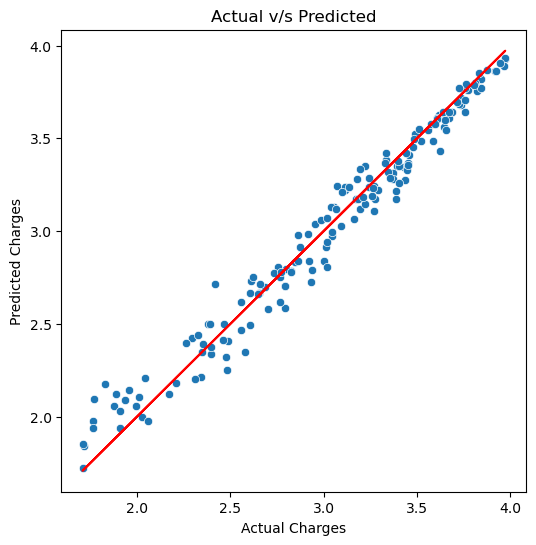

In [55]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=stu_gra_pred)
plt.plot(y_test,y_test,color = 'red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual v/s Predicted')
plt.show()

### Grade Prediction after applying PCA 

In [56]:
from sklearn.decomposition import PCA

In [58]:
components=[20, 25, 28, 30, 35, 37,40]
for i in components:
    pca = PCA(i)
    x_pca = pca.fit_transform(x_sr)
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.30, random_state=178)
    lr.fit(x_train_pca,y_train_pca)
    pred_test_lr_pca=lr.predict(x_test_pca)
    print('n_components =',i)
    print("r2_score is = ",r2_score(y_test,pred_test_lr_pca)*100)
    print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_lr_pca))
    print('mean_squared_error = ',mean_squared_error(y_test,pred_test_lr_pca))
    print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_lr_pca)),'\n')

n_components = 20
r2_score is =  98.3837378918373
mean_absolute_error =  0.05960727841973229
mean_squared_error =  0.005831521161293956
root_mean_squared_error =  0.0763643972103097 

n_components = 25
r2_score is =  98.3377006091623
mean_absolute_error =  0.06039709207623135
mean_squared_error =  0.005997625029454897
root_mean_squared_error =  0.07744433503785088 

n_components = 28
r2_score is =  98.29184730921257
mean_absolute_error =  0.060759294218648334
mean_squared_error =  0.006163065082538825
root_mean_squared_error =  0.07850519143686502 

n_components = 30
r2_score is =  98.23007139958376
mean_absolute_error =  0.06175927914177968
mean_squared_error =  0.006385954379045389
root_mean_squared_error =  0.0799121666521775 

n_components = 35
r2_score is =  98.09258967036516
mean_absolute_error =  0.06523182412175006
mean_squared_error =  0.006881992496365917
root_mean_squared_error =  0.08295777538221427 

n_components = 37
r2_score is =  98.1032856787868
mean_absolute_error =  

After using PCA we see that with 20 components there is a increase in r2 score and less error rate. So, we will check this for all the models and then save the best model.

In [59]:
pca = PCA(n_components=20)
x_pca = pca.fit_transform(x_sr)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.30, random_state=178)

In [62]:
lr_pca = LinearRegression()
lr_pca.fit(x_train_pca,y_train_pca)
lr_pred_pca = lr_pca.predict(x_test_pca)
lr_pred_train_pca = lr_pca.predict(x_train_pca)
lr_r2_train_pca = r2_score(y_train_pca, lr_pred_train_pca)
lr_r2_pca = r2_score(y_test_pca, lr_pred_pca)
lr_mae_pca = mean_absolute_error(y_test_pca, lr_pred_pca)
lr_mse_pca = mean_squared_error(y_test_pca, lr_pred_pca)
lr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, lr_pred_pca))
print("Linear Regression")
print("r2Score of train data is  ",lr_r2_train_pca)
print("r2Score of test data is  ",lr_r2_pca)
print("Mean absolute error of test data is  ", lr_mae_pca)
print("Mean squared error of test data is  ", lr_mse_pca)
print("Root Mean squared error of test data is  ", lr_rmse_pca)
print("\n\n")

Linear Regression
r2Score of train data is   0.9506235347169764
r2Score of test data is   0.9838315039765246
Mean absolute error of test data is   0.05953556784314702
Mean squared error of test data is   0.0058336408575695425
Root Mean squared error of test data is   0.07637827477476526





In [64]:
ls_pca = Lasso()
ls_pca.fit(x_train_pca,y_train_pca)
ls_pred_pca = ls_pca.predict(x_test_pca)
ls_pred_train_pca = ls_pca.predict(x_train_pca)
ls_r2_train_pca = r2_score(y_train_pca, ls_pred_train_pca)
ls_r2_pca = r2_score(y_test_pca, ls_pred_pca)
ls_mae_pca = mean_absolute_error(y_test_pca, ls_pred_pca)
ls_mse_pca = mean_squared_error(y_test_pca, ls_pred_pca)
ls_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, ls_pred_pca))
print("Lasso Regression")
print("r2Score of train data is  ",ls_r2_train_pca)
print("r2Score of test data is  ",ls_r2_pca)
print("Mean absolute error of test data is  ", ls_mae_pca)
print("Mean squared error of test data is  ", ls_mse_pca)
print("Root Mean squared error of test data is  ", ls_rmse_pca)
print("\n\n")

rg_pca = Ridge()
rg_pca.fit(x_train_pca,y_train_pca)
rg_pred_pca = rg_pca.predict(x_test_pca)
rg_pred_train_pca = rg_pca.predict(x_train_pca)
rg_r2_train_pca = r2_score(y_train_pca, rg_pred_train_pca)
rg_r2_pca = r2_score(y_test_pca, rg_pred_pca)
rg_mae_pca = mean_absolute_error(y_test_pca, rg_pred_pca)
rg_mse_pca = mean_squared_error(y_test_pca, rg_pred_pca)
rg_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, rg_pred_pca))
print("Ridge Regression")
print("r2Score of train data is  ",rg_r2_train_pca)
print("r2Score of test data is  ",rg_r2_pca)
print("Mean absolute error of test data is  ", rg_mae_pca)
print("Mean squared error of test data is  ", rg_mse_pca)
print("Root Mean squared error of test data is  ", rg_rmse_pca)
print("\n\n")

gbr_pca = GradientBoostingRegressor()
gbr_pca.fit(x_train_pca,y_train_pca)
gbr_pred_pca = gbr_pca.predict(x_test_pca)
gbr_pred_train_pca = gbr_pca.predict(x_train_pca)
gbr_r2_train_pca = r2_score(y_train_pca, gbr_pred_train_pca)
gbr_r2_pca = r2_score(y_test_pca, gbr_pred_pca)
gbr_mae_pca = mean_absolute_error(y_test_pca, gbr_pred_pca)
gbr_mse_pca = mean_squared_error(y_test_pca, gbr_pred_pca)
gbr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, gbr_pred_pca))
print("Gradient Boosting Regressor")
print("r2Score of train data is  ",gbr_r2_train_pca)
print("r2Score of test data is  ",gbr_r2_pca)
print("Mean absolute error of test data is  ", gbr_mae_pca)
print("Mean squared error of test data is  ", gbr_mse_pca)
print("Root Mean squared error of test data is  ", gbr_rmse_pca)
print("\n\n")

abr_pca = AdaBoostRegressor()
abr_pca.fit(x_train_pca,y_train_pca)
abr_pred_pca = abr_pca.predict(x_test_pca)
abr_pred_train_pca = abr_pca.predict(x_train_pca)
abr_r2_train_pca = r2_score(y_train_pca, abr_pred_train_pca)
abr_r2_pca = r2_score(y_test_pca, abr_pred_pca)
abr_mae_pca = mean_absolute_error(y_test_pca, abr_pred_pca)
abr_mse_pca = mean_squared_error(y_test_pca, abr_pred_pca)
abr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, abr_pred_pca))
print("Ada Boosting Regressor")
print("r2Score of train data is  ",abr_r2_train_pca)
print("r2Score of test data is  ",abr_r2_pca)
print("Mean absolute error of test data is  ", abr_mae_pca)
print("Mean squared error of test data is  ", abr_mse_pca)
print("Root Mean squared error of test data is  ", abr_rmse_pca)
print("\n\n")

rfr_pca = RandomForestRegressor()
rfr_pca.fit(x_train_pca,y_train_pca)
rfr_pred_pca = rfr_pca.predict(x_test_pca)
rfr_pred_train_pca = rfr_pca.predict(x_train_pca)
rfr_r2_train_pca = r2_score(y_train_pca, rfr_pred_train_pca)
rfr_r2_pca = r2_score(y_test_pca, rfr_pred_pca)
rfr_mae_pca = mean_absolute_error(y_test_pca, rfr_pred_pca)
rfr_mse_pca = mean_squared_error(y_test_pca, rfr_pred_pca)
rfr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, rfr_pred_pca))
print("Random Forest Regressor")
print("r2Score of train data is  ",rfr_r2_train_pca)
print("r2Score of test data is  ",rfr_r2_pca)
print("Mean absolute error of test data is  ", rfr_mae_pca)
print("Mean squared error of test data is  ", rfr_mse_pca)
print("Root Mean squared error of test data is  ", rfr_rmse_pca)
print("\n\n")

etr_pca = ExtraTreesRegressor()
etr_pca.fit(x_train_pca,y_train_pca)
etr_pred_pca = etr_pca.predict(x_test_pca)
etr_pred_train_pca = etr_pca.predict(x_train_pca)
etr_r2_train_pca = r2_score(y_train_pca, etr_pred_train_pca)
etr_r2_pca = r2_score(y_test_pca, etr_pred_pca)
etr_mae_pca = mean_absolute_error(y_test_pca, etr_pred_pca)
etr_mse_pca = mean_squared_error(y_test_pca, etr_pred_pca)
etr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, etr_pred_pca))
print("Extra Trees Regressor")
print("r2Score of train data is  ",etr_r2_train_pca)
print("r2Score of test data is  ",etr_r2_pca)
print("Mean absolute error of test data is  ", etr_mae_pca)
print("Mean squared error of test data is  ", etr_mse_pca)
print("Root Mean squared error of test data is  ", etr_rmse_pca)
print("\n\n")

dtr_pca = DecisionTreeRegressor()
dtr_pca.fit(x_train_pca,y_train_pca)
dtr_pred_pca = dtr_pca.predict(x_test_pca)
dtr_pred_train_pca = dtr_pca.predict(x_train_pca)
dtr_r2_train_pca = r2_score(y_train_pca, dtr_pred_train_pca)
dtr_r2_pca = r2_score(y_test_pca, dtr_pred_pca)
dtr_mae_pca = mean_absolute_error(y_test_pca, dtr_pred_pca)
dtr_mse_pca = mean_squared_error(y_test_pca, dtr_pred_pca)
dtr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, dtr_pred_pca))
print("Decision Tree Regressor")
print("r2Score of train data is  ",dtr_r2_train_pca)
print("r2Score of test data is  ",dtr_r2_pca)
print("Mean absolute error of test data is  ", dtr_mae_pca)
print("Mean squared error of test data is  ", dtr_mse_pca)
print("Root Mean squared error of test data is  ", dtr_rmse_pca)
print("\n\n")

knn_pca = KNN()
knn_pca.fit(x_train_pca,y_train_pca)
knn_pred_pca = knn_pca.predict(x_test_pca)
knn_pred_train_pca = knn_pca.predict(x_train_pca)
knn_r2_train_pca = r2_score(y_train_pca, knn_pred_train_pca)
knn_r2_pca = r2_score(y_test_pca, knn_pred_pca)
knn_mae_pca = mean_absolute_error(y_test_pca, knn_pred_pca)
knn_mse_pca = mean_squared_error(y_test_pca, knn_pred_pca)
knn_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, knn_pred_pca))
print("K-Nearest Neighbor")
print("r2Score of train data is  ",knn_r2_train_pca)
print("r2Score of test data is  ",knn_r2_pca)
print("Mean absolute error of test data is  ", knn_mae_pca)
print("Mean squared error of test data is  ", knn_mse_pca)
print("Root Mean squared error of test data is  ", knn_rmse_pca)
print("\n\n")


svr_pca = SVR()
svr_pca.fit(x_train_pca,y_train_pca)
svr_pred_pca = svr_pca.predict(x_test_pca)
svr_pred_train_pca = svr_pca.predict(x_train_pca)
svr_r2_train_pca = r2_score(y_train_pca, svr_pred_train_pca)
svr_r2_pca = r2_score(y_test_pca, svr_pred_pca)
svr_mae_pca = mean_absolute_error(y_test_pca, svr_pred_pca)
svr_mse_pca = mean_squared_error(y_test_pca, svr_pred_pca)
svr_rmse_pca = np.sqrt(mean_squared_error(y_test_pca, svr_pred_pca))
print("Super Vector Regressor")
print("r2Score of train data is  ",svr_r2_train_pca)
print("r2Score of test data is  ",svr_r2_pca)
print("Mean absolute error of test data is  ", svr_mae_pca)
print("Mean squared error of test data is  ", svr_mse_pca)
print("Root Mean squared error of test data is  ", svr_rmse_pca)
print("\n\n")

Lasso Regression
r2Score of train data is   0.7751685652330456
r2Score of test data is   0.8192829225775127
Mean absolute error of test data is   0.21843801028131346
Mean squared error of test data is   0.0652032523607457
Root Mean squared error of test data is   0.25534927523050793



Ridge Regression
r2Score of train data is   0.9506233780259777
r2Score of test data is   0.9838779665939417
Mean absolute error of test data is   0.05944290639322022
Mean squared error of test data is   0.00581687700872916
Root Mean squared error of test data is   0.07626845356193582



Gradient Boosting Regressor
r2Score of train data is   0.998310636999354
r2Score of test data is   0.9838910369812534
Mean absolute error of test data is   0.0499112618735335
Mean squared error of test data is   0.005812161174594978
Root Mean squared error of test data is   0.07623753127295622



Ada Boosting Regressor
r2Score of train data is   0.9811765525919781
r2Score of test data is   0.9732122224210437
Mean absolute

In [65]:
accuracy_data = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','AdaBoostRegressor','ExtraTreesRegressor','RandomForest','DecisionTree', 'Knn','svr'],
                          'r-square_train':[lr_r2_train_pca, ls_r2_train_pca,rg_r2_train_pca,gbr_r2_train_pca,abr_r2_train_pca, etr_r2_train_pca, rfr_r2_train_pca, dtr_r2_train_pca,knn_r2_train_pca,svr_r2_train_pca],
                          'r-square_test':[lr_r2_pca, ls_r2_pca,rg_r2_pca,gbr_r2_pca,abr_r2_pca, etr_r2_pca, rfr_r2_pca, dtr_r2_pca,knn_r2_pca,svr_r2_pca],    
                          'mae_score':[lr_mae_pca, ls_mae_pca,rg_mae_pca,gbr_mae_pca,abr_mae_pca, etr_mae_pca, rfr_mae_pca, dtr_mae_pca,knn_mae_pca,svr_mae_pca],
                          'mse_score':[lr_mse_pca, ls_mse_pca,rg_mse_pca,gbr_mse_pca,abr_mse_pca,etr_mse_pca,rfr_mse_pca, dtr_mse_pca,knn_mse_pca,svr_mse_pca],
                          'rmse_score':[lr_rmse_pca, ls_rmse_pca,rg_rmse_pca,gbr_rmse_pca,abr_rmse_pca,etr_rmse_pca,rfr_rmse_pca,dtr_rmse_pca,knn_rmse_pca,svr_rmse_pca]})
accuracy_data

Models  r-square_train  r-square_test  mae_score  mse_score  \
0               Linear        0.950624       0.983832   0.059536   0.005834   
1                Lasso        0.775169       0.819283   0.218438   0.065203   
2                Ridge        0.950623       0.983878   0.059443   0.005817   
3     GradientBoosting        0.998311       0.983891   0.049911   0.005812   
4    AdaBoostRegressor        0.981177       0.973212   0.077368   0.009665   
5  ExtraTreesRegressor        1.000000       0.990634   0.044079   0.003379   
6         RandomForest        0.990250       0.986556   0.050195   0.004851   
7         DecisionTree        1.000000       0.904651   0.085882   0.034402   
8                  Knn        0.955160       0.979978   0.065098   0.007224   
9                  svr        0.977410       0.978925   0.067310   0.007604   

   rmse_score  
0    0.076378  
1    0.255349  
2    0.076268  
3    0.076238  
4    0.098311  
5    0.058132  
6    0.069647  
7    0.185479  
8    0.084994  
9    0.087201

### Now we will check CV score for 20 Components

In [66]:
#linear Regression
lr_score_pca = cross_val_score(lr_pca, x_pca, y, cv=5)
print("Linear Regression-PCA")
print(lr_score_pca)
lr_mean_pca = np.mean(lr_score_pca)
print(lr_mean_pca)
lr_diff_pca = (lr_r2_pca - lr_score_pca.mean())
print(lr_diff_pca)
print("\n")

#Lasso Regression
ls_score_pca = cross_val_score(ls_pca, x_pca, y, cv=5)
print("Lasso Regression-PCA")
print(ls_score_pca)
ls_mean_pca = np.mean(ls_score_pca)
print(ls_mean_pca)
ls_diff_pca = (ls_r2_pca - ls_score_pca.mean())
print(ls_diff_pca)
print("\n")

#Ridge Regression
rg_score_pca = cross_val_score(rg_pca, x_pca, y, cv=5)
print("Ridge Regression-PCA")
print(rg_score_pca)
rg_mean_pca = np.mean(rg_score_pca)
print(rg_mean_pca)
rg_diff_pca = (rg_r2_pca - rg_score_pca.mean())
print(rg_diff_pca)
print("\n")

#Gradient Boosting Regression
gbr_score_pca = cross_val_score(gbr_pca, x_pca, y, cv=5)
print("Gradient Boosting Regression PCA")
print(gbr_score_pca)
gbr_mean_pca = np.mean(gbr_score_pca)
print(gbr_mean_pca)
gbr_diff_pca = (gbr_r2_pca - gbr_score_pca.mean())
print(gbr_diff_pca)
print("\n")

#AdaBoost Regression
abr_score_pca = cross_val_score(abr_pca, x_pca, y, cv=5)
print("Ada Boosting Regression PCA")
print(abr_score_pca)
abr_mean_pca = np.mean(abr_score_pca)
print(abr_mean_pca)
abr_diff_pca = (abr_r2_pca - abr_score_pca.mean())
print(abr_diff_pca)
print("\n")

#Extra Trees Regression
etr_score_pca = cross_val_score(etr_pca, x_pca, y, cv=5)
print("Extra Trees Regression PCA")
print(etr_score_pca)
etr_mean_pca = np.mean(etr_score_pca)
print(etr_mean_pca)
etr_diff_pca = (etr_r2_pca - etr_score_pca.mean())
print(etr_diff_pca)
print("\n")

#Random Forest Regression
rfr_score_pca = cross_val_score(rfr_pca, x_pca, y, cv=5)
print("Random forest Regression PCA")
print(rfr_score_pca)
rfr_mean_pca = np.mean(rfr_score_pca)
print(rfr_mean_pca)
rfr_diff_pca = (rfr_r2_pca - rfr_score_pca.mean())
print(rfr_diff_pca)
print("\n")

#Decision trees Regression
dtr_score_pca = cross_val_score(dtr_pca, x_pca, y, cv=5)
print("Decision trees Regression PCA")
print(dtr_score_pca)
dtr_mean_pca = np.mean(dtr_score_pca)
print(dtr_mean_pca)
dtr_diff_pca = (dtr_r2_pca - dtr_score_pca.mean())
print(dtr_diff_pca)
print("\n")

#KNN Regression
knn_score_pca = cross_val_score(knn_pca, x_pca, y, cv=5)
print("KNN Regression PCA")
print(knn_score_pca)
knn_mean_pca = np.mean(knn_score_pca)
print(knn_mean_pca)
knn_diff_pca = (knn_r2_pca - knn_score_pca.mean())
print(knn_diff_pca)
print("\n")

#Super Vector Regression
svr_score_pca = cross_val_score(svr_pca, x_pca, y, cv=5)
print("Super Vector Regression PCA")
print(svr_score_pca)
svr_mean_pca = np.mean(svr_score_pca)
print(svr_mean_pca)
svr_diff_pca = (svr_r2_pca - svr_score_pca.mean())
print(svr_diff_pca)
print("\n")

Linear Regression-PCA
[0.96096084 0.92043528 0.93076875 0.97555874 0.96876511]
0.951297742840271
0.032533761136253614


Lasso Regression-PCA
[0.80626589 0.77117981 0.76745104 0.80344916 0.80953428]
0.791576036556745
0.02770688602076765


Ridge Regression-PCA
[0.96102456 0.92041298 0.93076645 0.97562161 0.96878603]
0.9513223244567854
0.03255564213715623


Gradient Boosting Regression PCA
[0.97478629 0.93128916 0.96798376 0.98685668 0.98358209]
0.9688995968962562
0.014991440084997198


Ada Boosting Regression PCA
[0.94763301 0.8870954  0.92440564 0.98210677 0.97787348]
0.9438228590186919
0.029389363402351765


Extra Trees Regression PCA
[0.97098019 0.92449558 0.93671436 0.98923813 0.98450388]
0.961186426666616
0.029447448709130408


Random forest Regression PCA
[0.97117075 0.9020072  0.94928075 0.98759554 0.9849176 ]
0.9589943686063309
0.027561585507807074


Decision trees Regression PCA
[0.95177886 0.8745946  0.93429301 0.97380813 0.9721937 ]
0.9413336603285485
-0.036682923202326134


K

In [67]:
Cross_val_data_pca = pd.DataFrame({'Models':['Linear','Lasso','Ridge', 'GradientBoosting','Ada Boost','ExtraTrees Regressor','RandomForest','DecisionTree', 'Knn','svr'],
                               'r-square_train':[lr_r2_train_pca, ls_r2_train_pca,rg_r2_train_pca,gbr_r2_train_pca,abr_r2_train_pca, etr_r2_train_pca, rfr_r2_train_pca, dtr_r2_train_pca,knn_r2_train_pca,svr_r2_train_pca],
                          'r-square_test':[lr_r2_pca, ls_r2_pca,rg_r2_pca,gbr_r2_pca,abr_r2_pca, etr_r2_pca, rfr_r2_pca, dtr_r2_pca,knn_r2_pca,svr_r2_pca],    
                          'CV_mean':[lr_mean_pca, ls_mean_pca,rg_mean_pca,gbr_mean_pca,abr_mean_pca, etr_mean_pca, rfr_mean_pca, dtr_mean_pca,knn_mean_pca,svr_mean_pca], 
                              'diff_cv_r2':[lr_diff_pca, ls_diff_pca,rg_diff_pca,gbr_diff_pca,abr_diff_pca,etr_diff_pca,rfr_diff_pca, dtr_diff_pca,knn_diff_pca,svr_diff_pca]})
Cross_val_data_pca

Models  r-square_train  r-square_test   CV_mean  diff_cv_r2
0                Linear        0.950624       0.983832  0.951298    0.032534
1                 Lasso        0.775169       0.819283  0.791576    0.027707
2                 Ridge        0.950623       0.983878  0.951322    0.032556
3      GradientBoosting        0.998311       0.983891  0.968900    0.014991
4             Ada Boost        0.981177       0.973212  0.943823    0.029389
5  ExtraTrees Regressor        1.000000       0.990634  0.961186    0.029447
6          RandomForest        0.990250       0.986556  0.958994    0.027562
7          DecisionTree        1.000000       0.904651  0.941334   -0.036683
8                   Knn        0.955160       0.979978  0.938418    0.041560
9                   svr        0.977410       0.978925  0.937574    0.041351

#### Here also, we see gradient boosting is giving the least difference among the r2 score and the cv-Score

#### Hyper-parameter Tuning

In [69]:
param_grid_pca = {"learning_rate":[0.1,0.2,0.3], "n_estimators":[30,40,60], "criterion":['friedman_mse','squared_error'],
                "min_samples_split":[2,4,6,7,8], "max_depth":[2,4,6,10], "max_features":['sqrt','log2'] }

In [70]:
gd_gbr_pca = GridSearchCV(GradientBoostingRegressor(), param_grid_pca, cv=5)
gd_gbr_pca.fit(x_train_pca,y_train_pca)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 7, 8],
                         'n_estimators': [30, 40, 60]})

In [71]:
best_parameters_Pca=gd_gbr_pca.best_params_
print(best_parameters_Pca)
best_result_Pca=gd_gbr_pca.best_score_
print(best_result_Pca*100)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 60}
93.60960106485601


In [72]:
stu_gra_pca = GradientBoostingRegressor(criterion = 'friedman_mse',learning_rate=0.2, max_depth=2, max_features= 'sqrt', 
                                    min_samples_split=6, n_estimators=60)

In [73]:
stu_gra_pca.fit(x_train_pca,y_train_pca)
stu_gra_pca_pred = stu_gra_pca.predict(x_test_pca)
stu_gra_pca_r2 = r2_score(y_test_pca, stu_gra_pca_pred)
stu_gra_pca_mae = mean_absolute_error(y_test_pca, stu_gra_pca_pred)
stu_gra_pca_mse = mean_squared_error(y_test_pca, stu_gra_pca_pred)
stu_gra_pca_rmse = np.sqrt(mean_squared_error(y_test_pca, stu_gra_pca_pred))

print("r2Score of test data is  ",stu_gra_pca_r2)
print("Mean absolute error of test data is  ", stu_gra_pca_mae)
print("Mean squared error of test data is  ", stu_gra_pca_mse)
print("Root Mean squared error of test data is  ", stu_gra_pca_rmse)
print("\n")

r2Score of test data is   0.9435896411934351
Mean absolute error of test data is   0.09645089807230797
Mean squared error of test data is   0.020353023153565984
Root Mean squared error of test data is   0.14266402193113015




#### After applying PCA we got best 20 features and using these 20 features we dint get any best models so we consider Model without using PCA.

#### Without PCA -  Model accuracy is 97% 
#### With PCA - Model accuracy is 94%. 

### So, the best and accurate model is Gradient Boosting Regressor without applying PCA